# **Informe exploratorio de los datos: Metodología CRISP-DM para la Evaluación Climática en Australia**

Este informe técnico detalla la aplicación rigurosa de la metodología CRISP-DM (Proceso Estándar Interindustrial para la Minería de Datos) en el análisis exhaustivo de datos climáticos de Australia. El objetivo central de este proyecto es generar insights de alto impacto y conocimiento accionable que sirvan de apoyo a la toma de decisiones estratégicas en diversos sectores industriales que son particularmente vulnerables a las variaciones climáticas.

## Entendimiento del Negocio

**Contexto**: Australia experimenta una amplia gama de condiciones climáticas, desde desiertos áridos hasta regiones tropicales. La predicción precisa de lluvia es crucial para diversas industrias, incluyendo agricultura, gestión de recursos hídricos y planificación de eventos.

**Objetivo**:
* Segmentación Climática: Identificar y caracterizar diferentes patrones climáticos en Australia, teniendo en cuenta la diversidad geográfica y las variaciones estacionales. Esto podría incluir la identificación de regiones propensas a sequías, inundaciones, incendios forestales u otros eventos extremos.

* Predicción de Eventos Extremos: Desarrollar modelos para predecir la ocurrencia y la intensidad de eventos climáticos extremos, como sequías, inundaciones o incendios forestales, con el fin de anticipar y mitigar sus impactos.

**Criterios de Éxito**:

**Segmentación Climática:**

* Clusters bien definidos y diferenciados.
* Interpretabilidad de los clusters en términos de patrones climáticos significativos.
* Métricas de evaluación de clustering que indiquen una buena calidad de la agrupación (por ejemplo, Silhouette Score, Calinski-Harabasz Index).

**Análisis de Factores de Riesgo:**

* Identificación de relaciones relevantes (lineales o no lineales) entre las variables meteorológicas y los eventos extremos.
*Cuantificación de la importancia de cada variable en la predicción de eventos extremos.
*Interpretabilidad de los modelos utilizados para el análisis.

**Predicción de Eventos Extremos:**

* Modelos con alta precisión y capacidad de generalización.
*Métricas de evaluación adecuadas para problemas de clasificación o regresión (según el tipo de modelo utilizado).
* Capacidad de los modelos para proporcionar predicciones tempranas y confiables.

In [6]:
#Importar dependencias

#Manipulación de datos
import numpy as np
import pandas as pd

#Visualización y modelo
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
import scipy.stats as stats
%matplotlib inline

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import tree

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
pd.set_option("display.max_columns",None)

In [9]:
#Importar datos del CSV
data_frame = pd.read_csv('weatherAUS.csv', on_bad_lines='skip')

### Entendimiento de los Datos

**Fuente de Datos:** Oficina de Meteorología de la Commonwealth de Australia

**Descripción de los Datos:** El conjunto de datos contiene observaciones meteorológicas diarias de múltiples ubicaciones en Australia. Las variables incluyen:

In [10]:
data_frame.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


| **Columna** | **Descripción** | **Unidades** |
| --------------- | -------------- | --------- |
| `Date` | Fecha de la observación | N/A |
| `Location` | Ubicación de la estación meteorológica | N/A |
| `MinTemp` | Temperatura mínima en las 24 horas hasta las 9 de la mañana | Grados Celsius |
| `MaxTemp` | Temperatura máxima en las 24 horas hasta las 9 de la mañana | Grados Celsius |
| `Rainfall` | lluvia en las 24 horas hasta las 9 de la mañana | Milímetros |
| `Evaporation` | Evaporación en las 24 horas hasta las 9 de la mañana | Milímetros |
| `Sunshine` | Sol en las 24 horas hasta la medianoche | Horas |
| `WindGustDir` | Dirección de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche | 16 puntos cardinales |
| `WindGustSpeed` | Velocidad de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche | Kilómetros por hora |
| `WindDir9am` | Dirección del viento a las 9 de la mañana | 16 puntos cardinales |
| `WindDir3pm` | Dirección del viento a las 3 de la tarde | 16 puntos cardinales |
| `WindSpeed9am` | Velocidad del viento a las 9 de la mañana | Kilómetros por hora |
| `WindSpeed3pm` | Velocidad del viento a las 3 de la tarde | Kilómetros por hora |
| `Humidity9am` | Humedad a las 9 de la mañana | Porcentaje |
| `Humidity3pm` | Humedad a las 3 de la tarde | Porcentaje |
| `Pressure9am` | Presión atmosférica reducida al nivel medio del mar a las 9 de la mañana | Hectopascales |
| `Pressure3pm` | Presión atmosférica reducida al nivel medio del mar a las 3 de la tarde | Hectopascales |
| `Cloud9am` | Fracción del cielo oscurecida por nubes a las 9 de la mañana | Octavos |
| `Cloud3pm` | Fracción del cielo oscurecida por nubes a las 3 de la tarde | Octavos |
| `Temp9am` | Temperatura a las 9 de la mañana | Grados Celsius |
| `Temp3pm` | Temperatura a las 3 de la mañana | Grados Celsius |
| `RainToday` | ¿Hoy hubieron precipitaciones superiores a 1 mm en las 24 horas hasta las 9 de la mañana? | N/A
| `RainTomorrow` | ¿Mañana habrán precipitaciones superiores a 1 mm en las 24 horas hasta las 9 de la mañana? | N/A

In [11]:
data_frame.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [12]:
data_frame.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


### Preprocesamiento de los datos

In [13]:
data_frame.shape

(142193, 24)

In [14]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [15]:
# Columnas categoricas:

categorical_features = [column_name for column_name in data_frame.columns if data_frame[column_name].dtype == 'O']
print("Numero de columnas categoricas: {}".format(len(categorical_features)))
print("Columnas categoricas: ",categorical_features)

Numero de columnas categoricas: 7
Columnas categoricas:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [16]:
# Columnas numericas:

numerical_features = [column_name for column_name in data_frame.columns if data_frame[column_name].dtype != 'O']


print("Numero de columnas numericas: {}".format(len(numerical_features)))
print("Columnas numericas: ",numerical_features)

Numero de columnas numericas: 17
Columnas numericas:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


In [17]:
# Encontrar cardinalidad de columnas categoricas:

for each_feature in categorical_features:
    print("Cardinalidad(no. de valores unicos) de {} son: {}".format(each_feature,len(data_frame[each_feature].unique())))

Cardinalidad(no. de valores unicos) de Date son: 3436
Cardinalidad(no. de valores unicos) de Location son: 49
Cardinalidad(no. de valores unicos) de WindGustDir son: 17
Cardinalidad(no. de valores unicos) de WindDir9am son: 17
Cardinalidad(no. de valores unicos) de WindDir3pm son: 17
Cardinalidad(no. de valores unicos) de RainToday son: 3
Cardinalidad(no. de valores unicos) de RainTomorrow son: 2


In [18]:
# Conversión de tipo de columna de fecha al tipo de fecha y hora

data_frame['Date'] = pd.to_datetime(data_frame['Date'])

In [19]:
data_frame['Date'].dtype

dtype('<M8[ns]')

In [20]:
data_frame['year'] = data_frame['Date'].dt.year
data_frame['month'] = data_frame['Date'].dt.month
data_frame['day'] = data_frame['Date'].dt.day

In [21]:
data_frame.drop('Date', axis = 1, inplace = True)

In [22]:
#Conversión de columnas

# Lista de columnas
columns = [('Humidity', 'Humidity9am', 'Humidity3pm'),
                     ('Pressure', 'Pressure9am', 'Pressure3pm'),
                     ('Cloud', 'Cloud9am', 'Cloud3pm'),
                     ('Temperature', 'Temp9am', 'Temp3pm')]

# Procesar las columnas en un bucle
for column_name, column1, column2 in columns:
    data_frame[column_name] = data_frame[[column1, column2]].mean(axis=1)
    data_frame.drop([column1, column2], axis=1, inplace=True)

# Verifica los cambios en tu DataFrame
print(data_frame.head())

  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm RainToday  \
0           44.0          W        WNW          20.0          24.0        No   
1           44.0        NNW        WSW           4.0          22.0        No   
2           46.0          W        WSW          19.0          26.0        No   
3           24.0         SE          E          11.0           9.0        No   
4           41.0        ENE         NW           7.0          20.0        No   

   RISK_MM RainTomorrow  year  month  day  Humidity  Pre

In [23]:
data_frame.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,RainToday,RISK_MM,RainTomorrow,year,month,day,Humidity,Pressure,Cloud,Temperature
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,No,0.0,No,2008,12,1,46.5,1007.40,8.0,19.35
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,No,0.0,No,2008,12,2,34.5,1009.20,NaN,20.75
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,No,0.0,No,2008,12,3,34.0,1008.15,2.0,22.10
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,No,1.0,No,2008,12,4,30.5,1015.20,NaN,22.30
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,No,0.2,No,2008,12,5,57.5,1008.40,7.5,23.75


In [24]:
# Columnas categoricos:

categorical_features = [column_name for column_name in data_frame.columns if data_frame[column_name].dtype == 'O']
print("Numero de columnas categoricas: {}".format(len(categorical_features)))
print("Columnas categoricos: ",categorical_features)

Numero de columnas categoricas: 6
Columnas categoricos:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [25]:
# Columnas numericas:

numerical_features = [column_name for column_name in data_frame.columns if data_frame[column_name].dtype != 'O']
#rain.select_dtypes(include=['float64','int64']).columns
print("Numero de columnas numericas: {}".format(len(numerical_features)))
print("Columnas numericas: ",numerical_features)

Numero de columnas numericas: 16
Columnas numericas:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'RISK_MM', 'year', 'month', 'day', 'Humidity', 'Pressure', 'Cloud', 'Temperature']


# **Preparación de Datos (Data Preparation)**

* Esta fase se enfoca en hacer que tus datos sean consistentes, completos y aptos para el análisis.

### Valores nulos

In [26]:
#Identificación general
data_frame[categorical_features].isnull().sum()

,0
Location,0
WindGustDir,9330
WindDir9am,10013
WindDir3pm,3778
RainToday,1406
RainTomorrow,0


In [27]:
# Lista de columnas categoricas que tienen valores nulos:
categorical_features_with_null = [feature for feature in categorical_features if data_frame[feature].isnull().sum()]
categorical_features_with_null

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [28]:
# Reemplazar los nulos por el valor mas frecuente (moda):
for each_feature in categorical_features_with_null:
    mode_val = data_frame[each_feature].mode()[0]
    data_frame[each_feature].fillna(mode_val,inplace=True)

In [29]:
data_frame[categorical_features].isnull().sum()

,0
Location,0
WindGustDir,0
WindDir9am,0
WindDir3pm,0
RainToday,0
RainTomorrow,0


In [30]:
# Verificamos valores nulos en columnas numericas:
data_frame[numerical_features].isnull().sum()

,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustSpeed,9270
WindSpeed9am,1348
WindSpeed3pm,2630
RISK_MM,0
year,0


**Mapa de calor**

<Axes: >

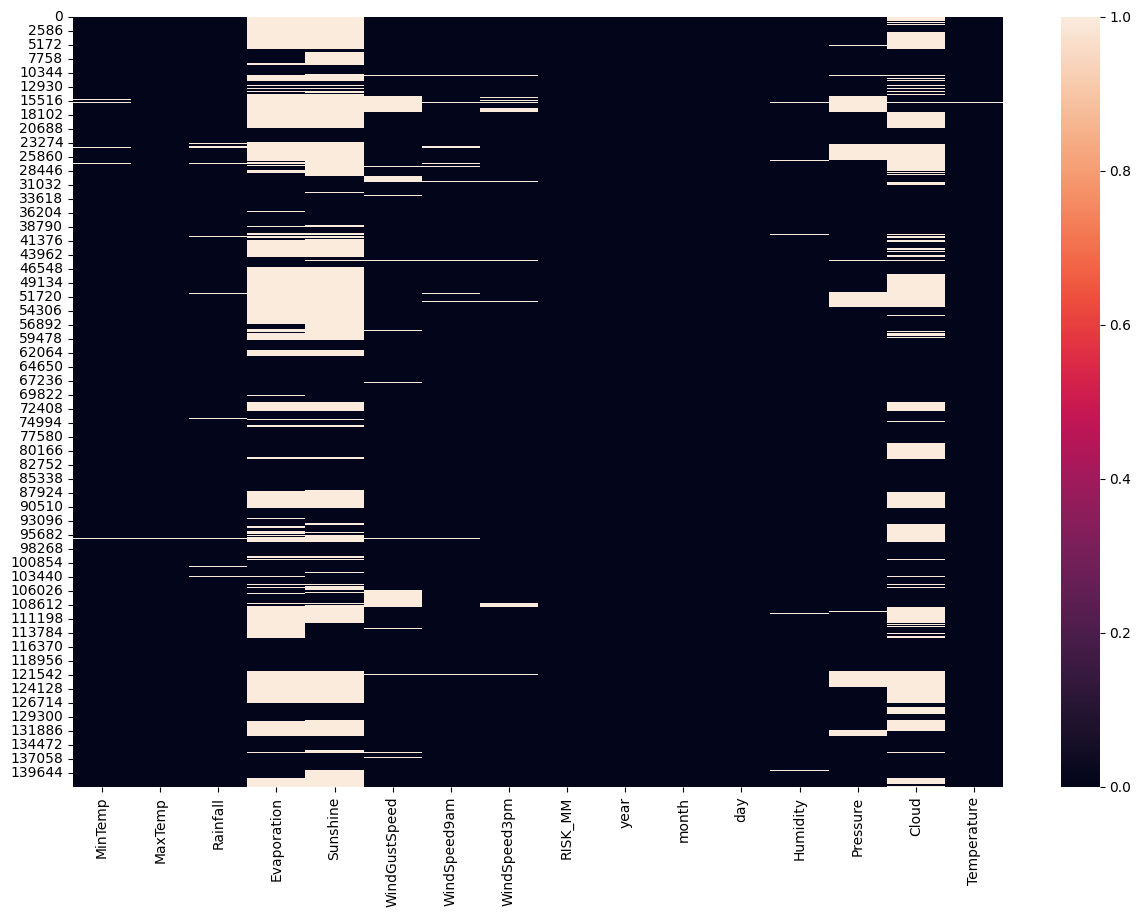

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(data_frame[numerical_features].isnull(),linecolor='white')

Las mediciones relacionadas con la evaporación, las horas de sol y la nubosidad, específicamente las columnas "Evaporation", "Sunshine", "Cloud9am" y "Cloud3pm", exhiben una cantidad alarmante de datos ausentes. Esta carencia de información podría comprometer seriamente la integridad de cualquier estudio que involucre estos factores. Asimismo, variables meteorológicas fundamentales como las temperaturas máximas y mínimas, junto con aquellas vinculadas a la dirección y velocidad del viento, así como la presión atmosférica, también presentan algunos vacíos, aunque en menor medida.

In [32]:
# El número de valores faltantes por columna como porcentaje:

round(data_frame.isna().sum() / len(data_frame), 3)

,0
Location,0.000
MinTemp,0.004
MaxTemp,0.002
Rainfall,0.010
Evaporation,0.428
Sunshine,0.477
WindGustDir,0.000
WindGustSpeed,0.065
WindDir9am,0.000
WindDir3pm,0.000


In [33]:
# Lista de columnas numericas con valores nulos:

numerical_features_with_null = [feature for feature in numerical_features if data_frame[feature].isnull().sum()]
numerical_features_with_null

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity',
 'Pressure',
 'Cloud',
 'Temperature']

In [34]:
# Reemplazando valores nulos usando la media:

for feature in numerical_features_with_null:
    mean_value = data_frame[feature].mean()
    data_frame[feature].fillna(mean_value,inplace=True)

In [35]:
data_frame.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


* Existen cuatro columnas críticas ("Evaporation", "Sunshine", "Cloud9am" y "Cloud3pm") que tienen >30% de sus valores faltantes, lo cual es extremadamente elevado.

* Con la excepción de "Date" y "Location", todas las demás columnas tienen al menos algún porcentaje de valores faltantes, siendo las más afectadas "Pressure9am" y "Pressure3pm" con alrededor del 10% de ausencia de datos.

* Los altos porcentajes de valores faltantes en algunas columnas clave sugieren la necesidad de implementar técnicas de imputación, eliminación de filas/columnas o una combinación de ambas estrategias para poder realizar un análisis confiable de los datos.


### Limpieza de datos

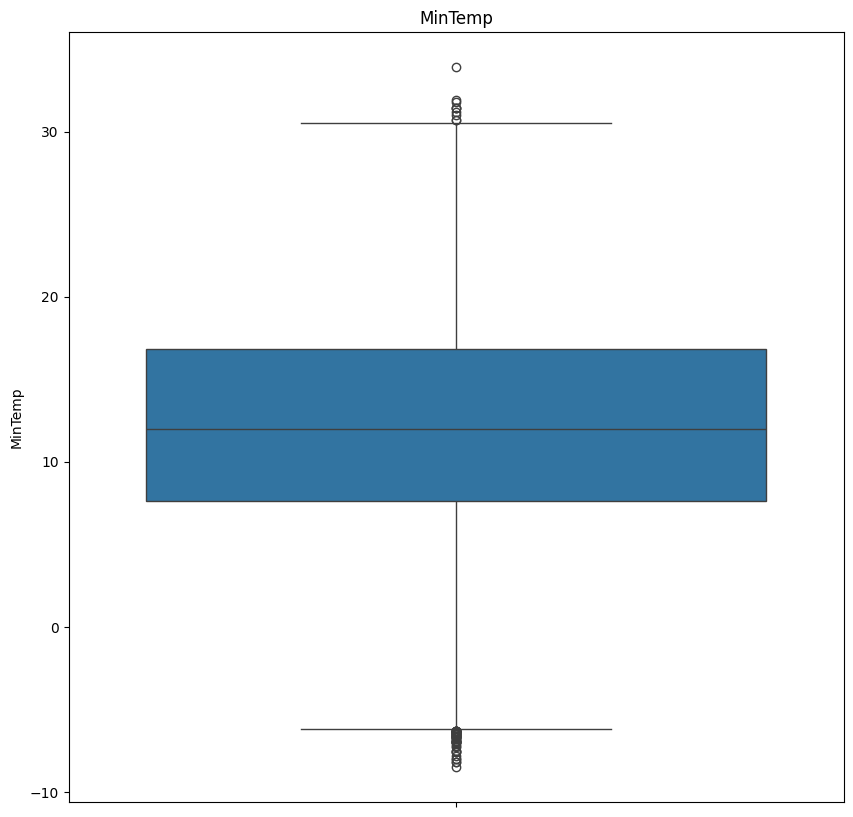

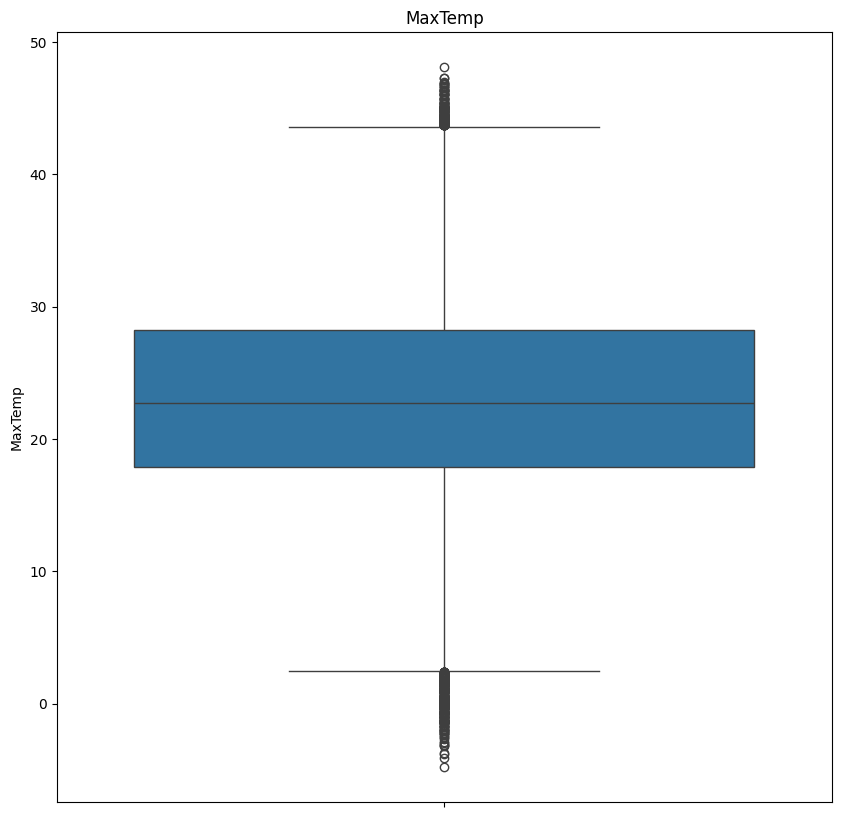

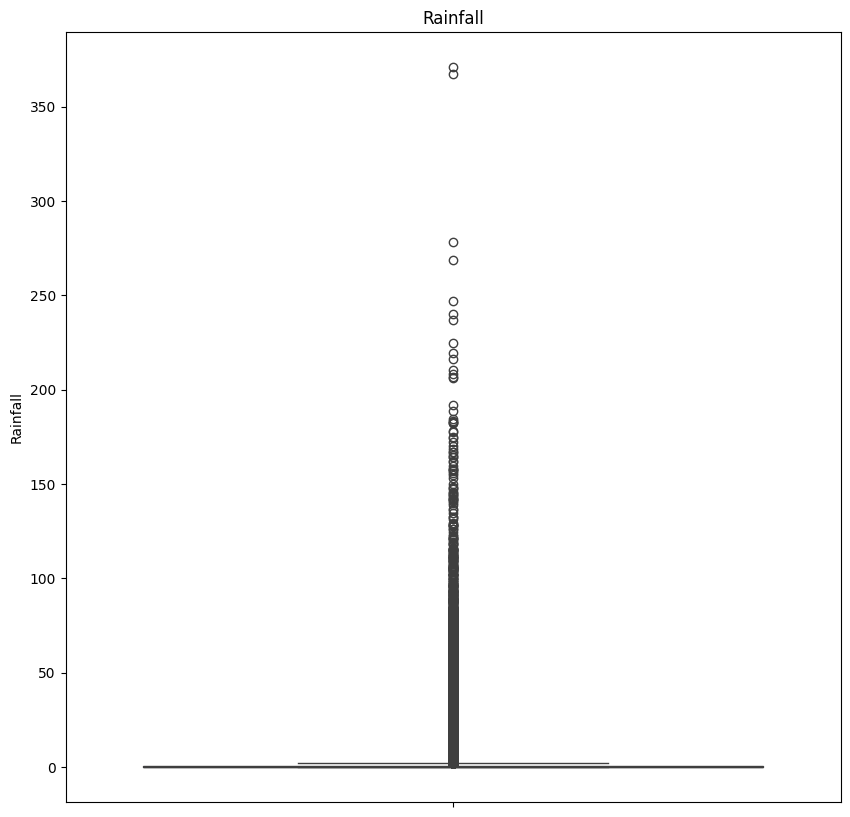

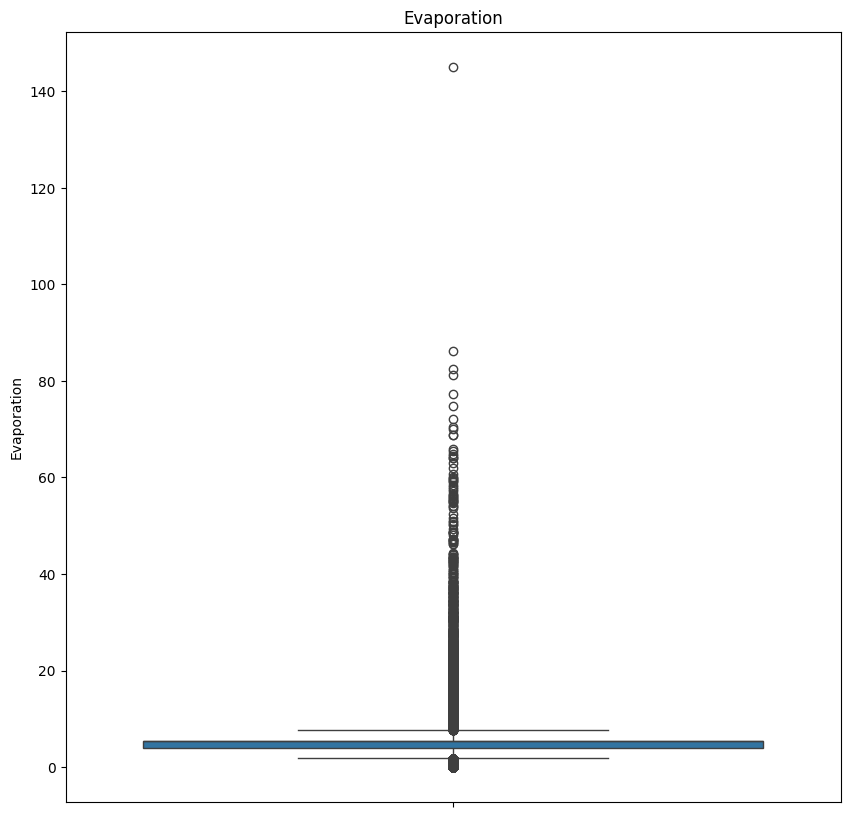

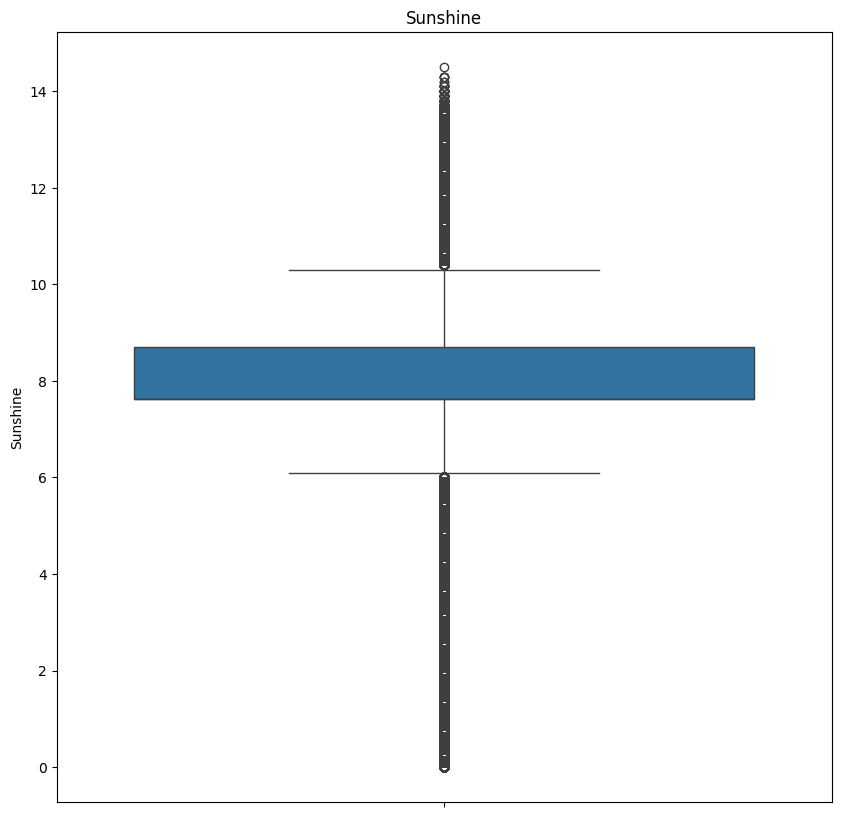

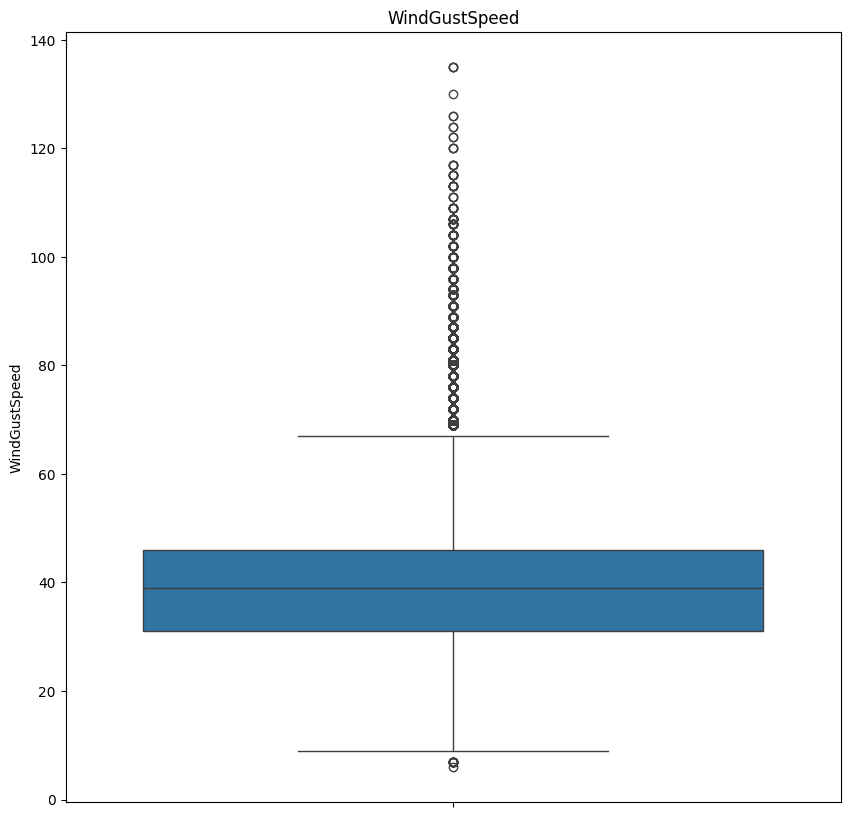

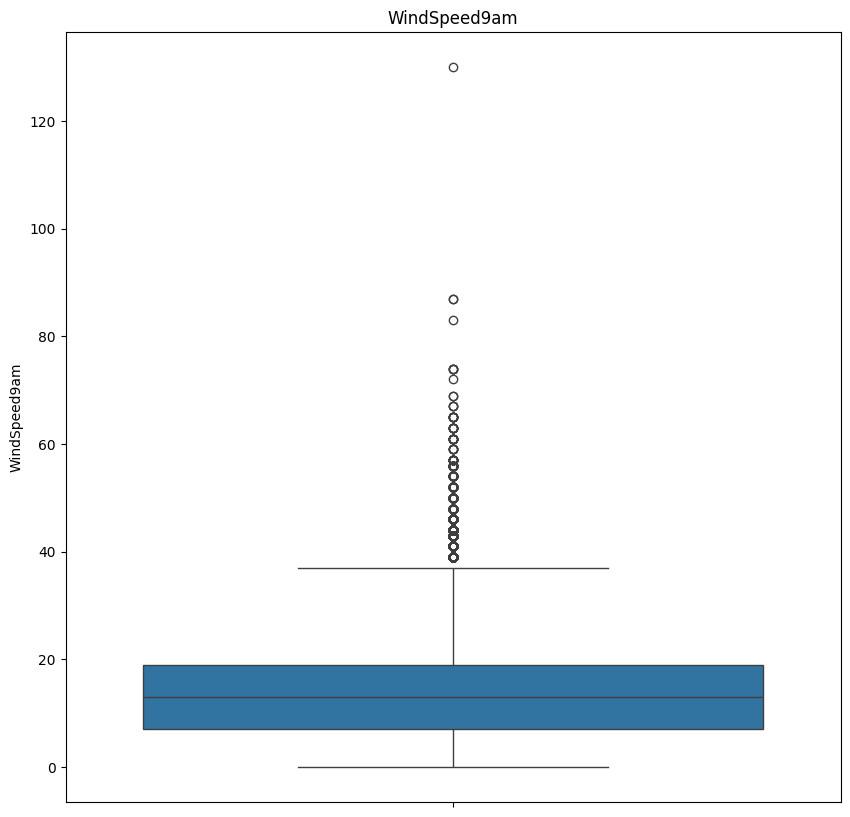

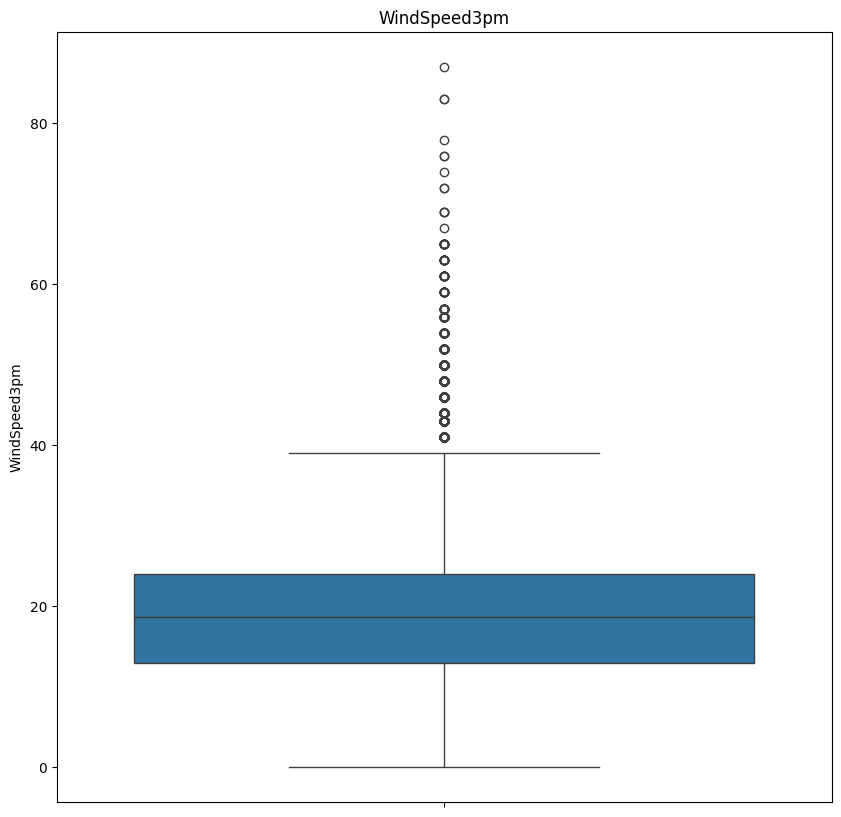

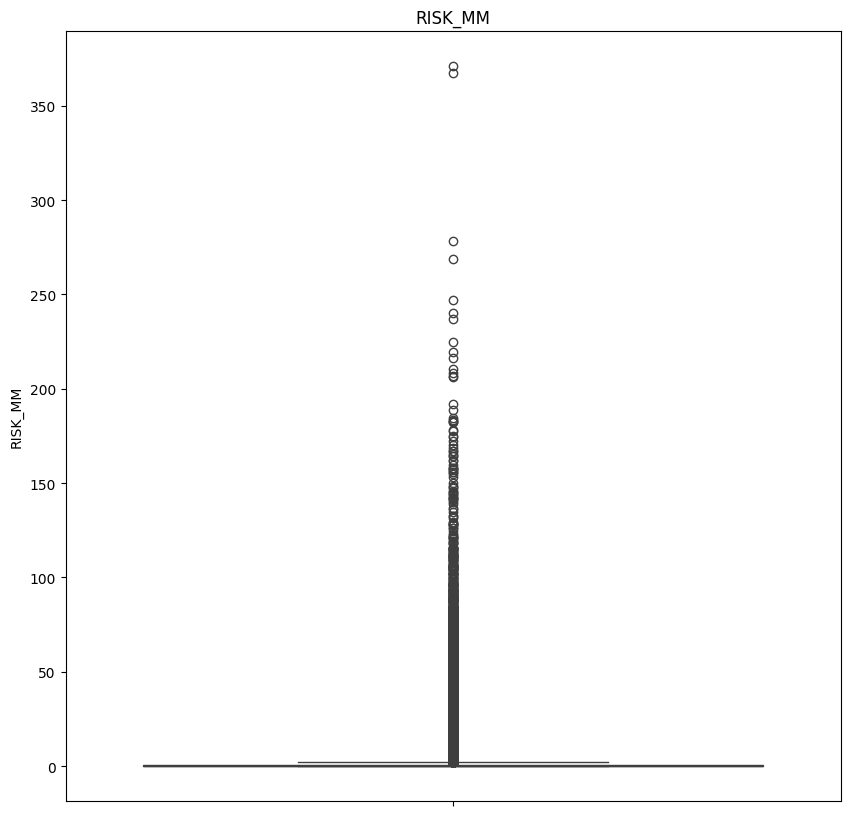

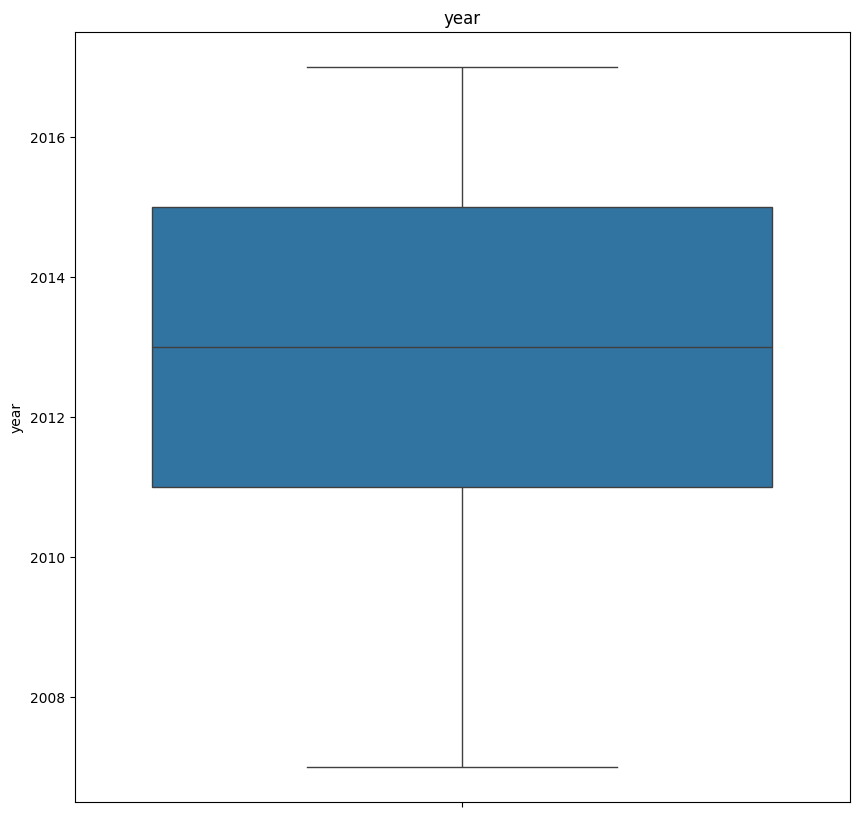

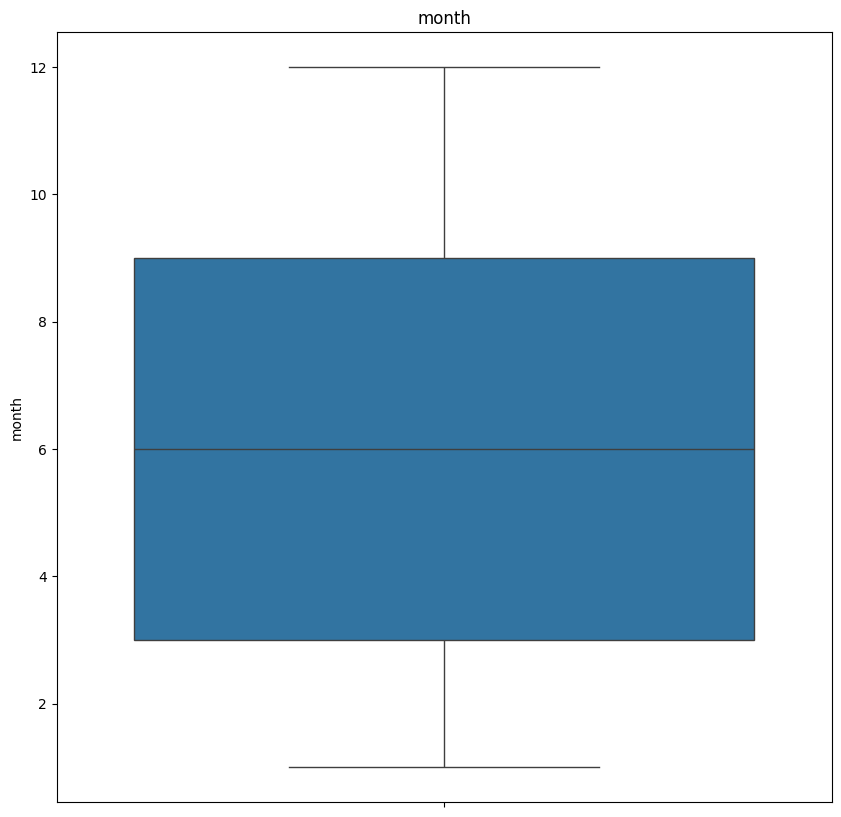

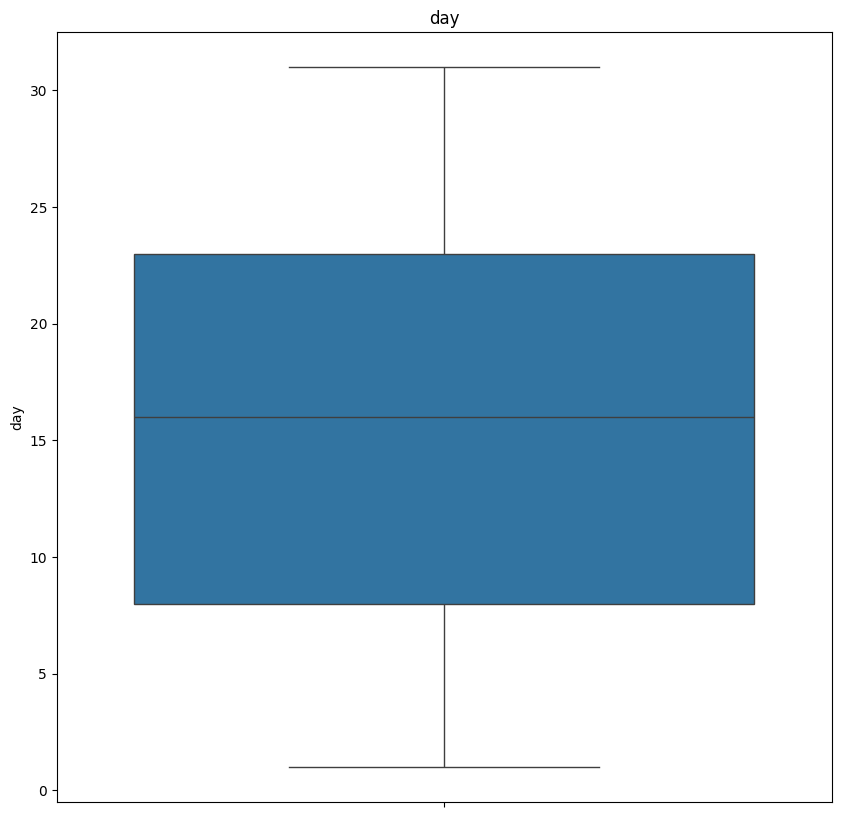

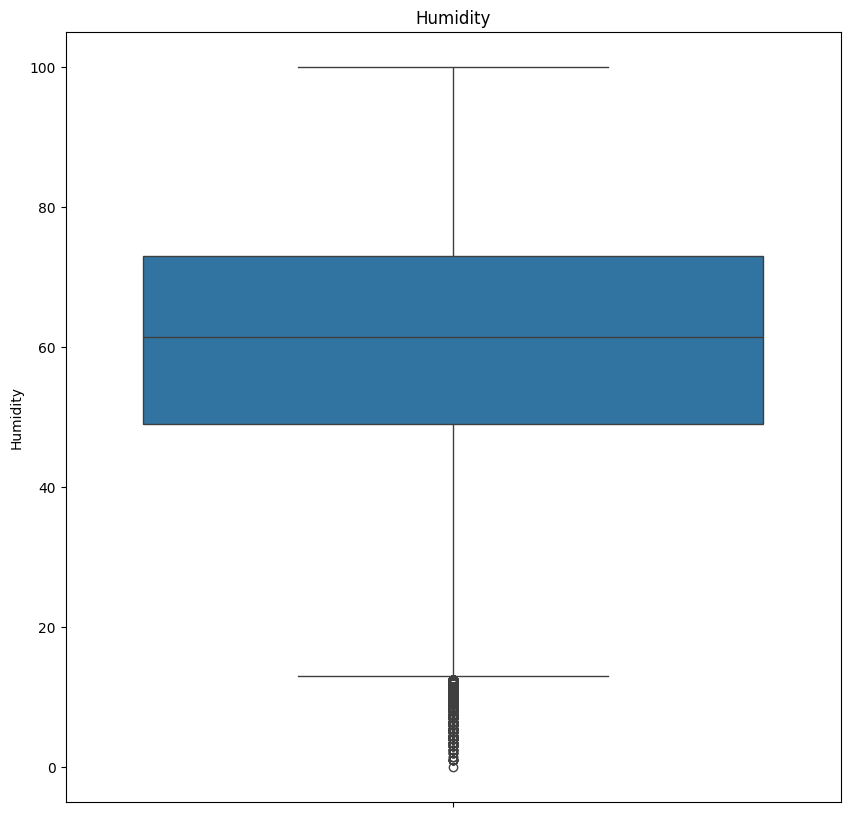

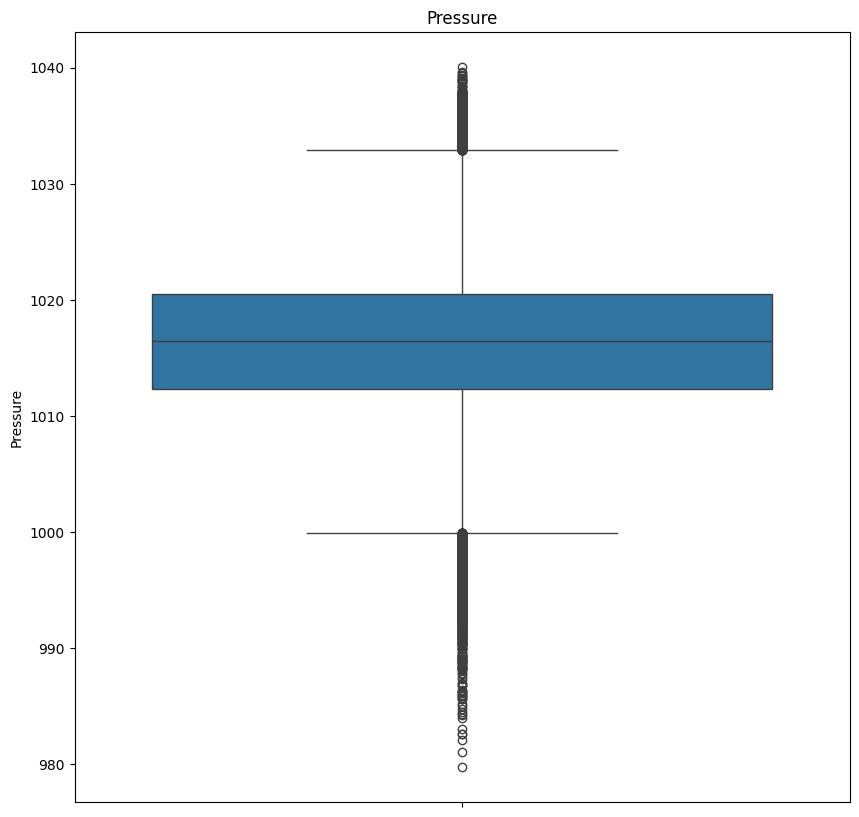

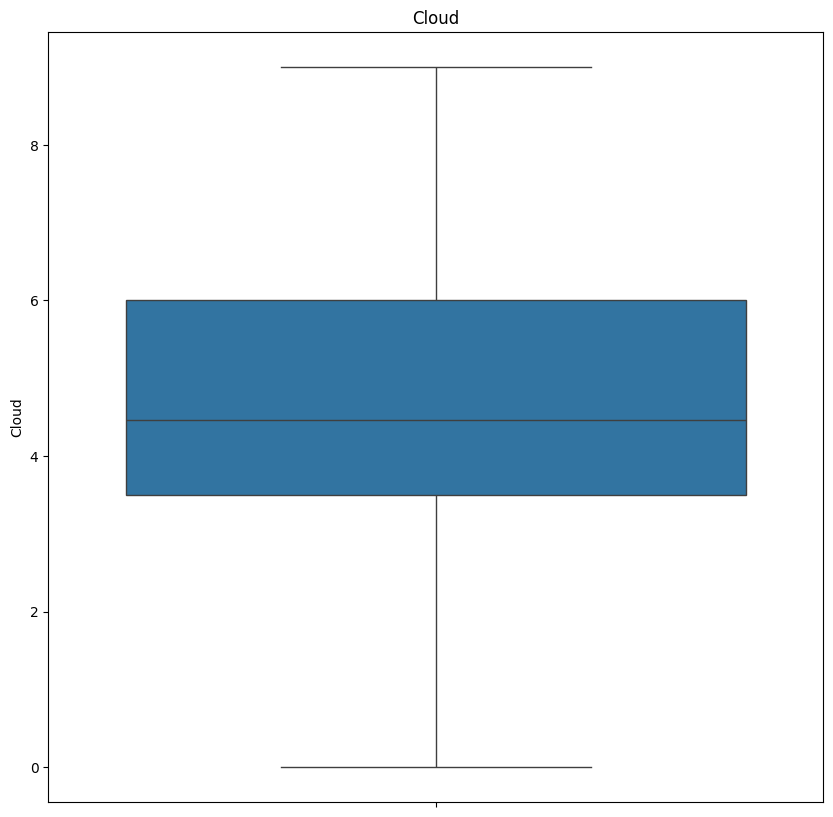

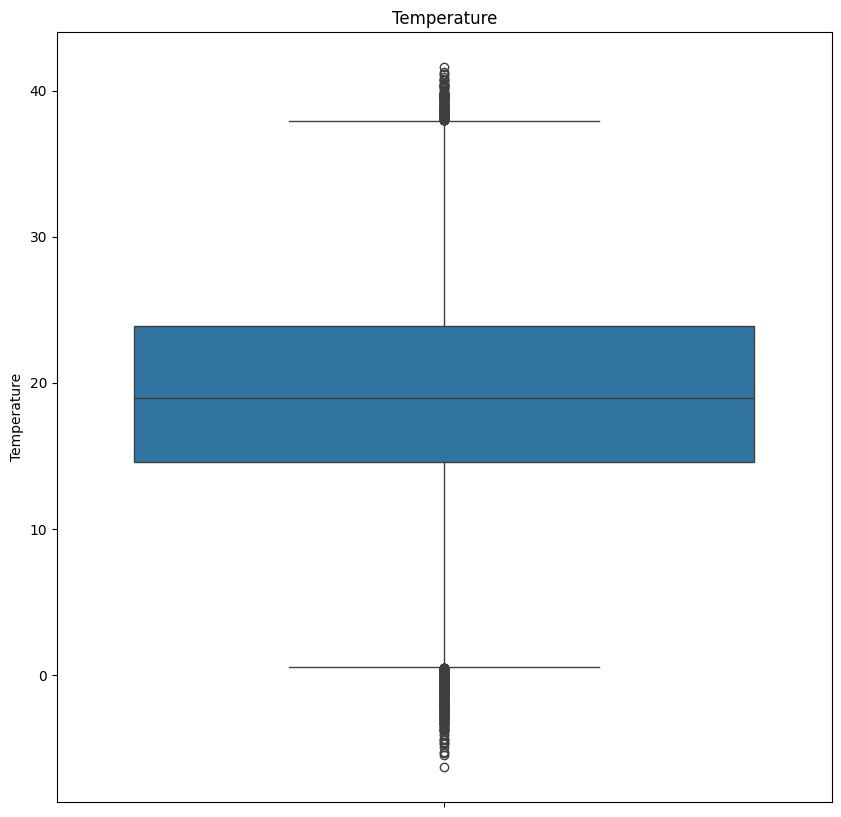

In [36]:
# Verificando outliers con diagrama de caja (boxplot):

for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(data_frame[feature])
    plt.title(feature)


**Observación:**
Los diagramas de caja revelan la presencia significativa de valores atípicos en varias columnas numéricas del conjunto de datos. Esto puede deberse a la naturaleza errática e impredecible del clima o a posibles errores en la recolección de datos. Estos valores atípicos pueden sesgar los análisis posteriores, por lo que es crucial abordarlos adecuadamente. Una estrategia efectiva es utilizar el rango intercuartílico (IQR) para identificar y filtrar los valores atípicos, conservando solo aquellos valores que se consideren válidos y representativos de la distribución subyacente.

In [37]:
# Verificando outliers usando formulas estadisticas:

data_frame[numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,RISK_MM,year,month,day,Humidity,Pressure,Cloud,Temperature
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,2.360682,2012.758926,6.402544,15.715084,60.328222,1016.455480,4.461558,19.320563
std,6.388924,7.109554,8.423217,3.168114,2.734927,13.138385,8.851082,8.721551,8.477969,2.541256,3.426506,8.798150,18.199334,6.654095,2.067069,6.475008
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2007.000000,1.000000,1.000000,0.000000,979.750000,0.000000,-6.300000
25%,7.600000,17.900000,0.000000,4.000000,7.624853,31.000000,7.000000,13.000000,0.000000,2011.000000,3.000000,8.000000,49.000000,1012.300000,3.500000,14.550000
50%,12.000000,22.700000,0.000000,5.469824,7.624853,39.000000,13.000000,18.637576,0.000000,2013.000000,6.000000,16.000000,61.500000,1016.455480,4.461558,18.950000
75%,16.800000,28.200000,0.800000,5.469824,8.700000,46.000000,19.000000,24.000000,0.800000,2015.000000,9.000000,23.000000,73.000000,1020.550000,6.000000,23.900000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,371.000000,2017.000000,12.000000,31.000000,100.000000,1040.050000,9.000000,41.600000


In [38]:
# Columnas que tienen outliers:

features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity', 'Pressure', 'Temperature']

In [39]:
# Reemplazando outliers usando IQR:

for feature in features_with_outliers:
    q1 = data_frame[feature].quantile(0.25)
    q3 = data_frame[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data_frame.loc[data_frame[feature]<lower_limit,feature] = lower_limit
    data_frame.loc[data_frame[feature]>upper_limit,feature] = upper_limit

**Visualización de la distribución de columnas numéricas después de tratar valores atípicos**

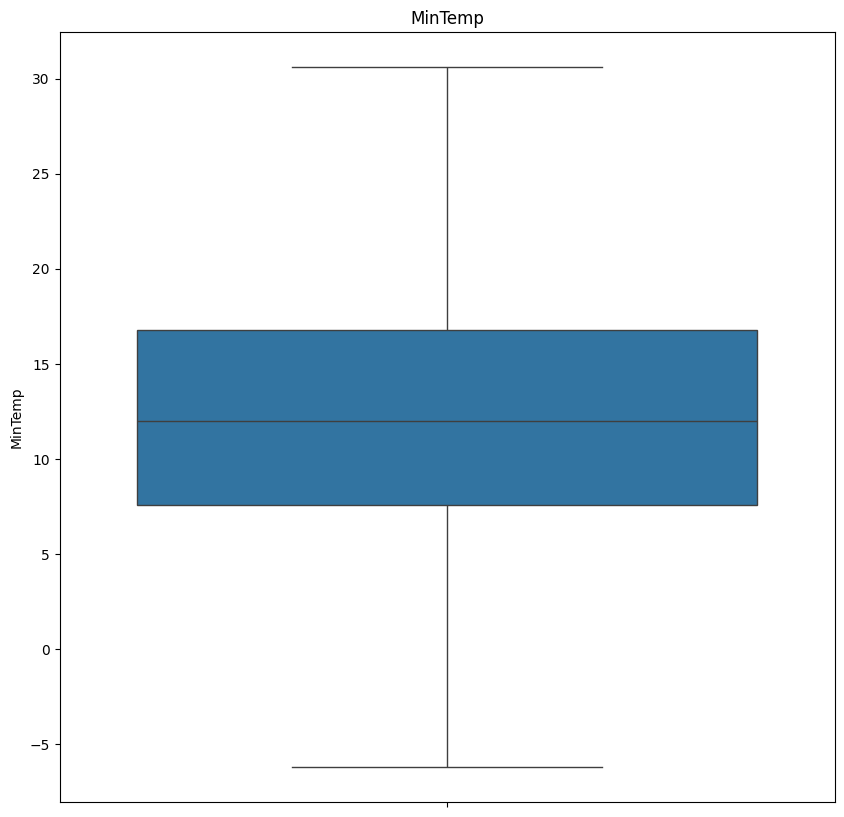

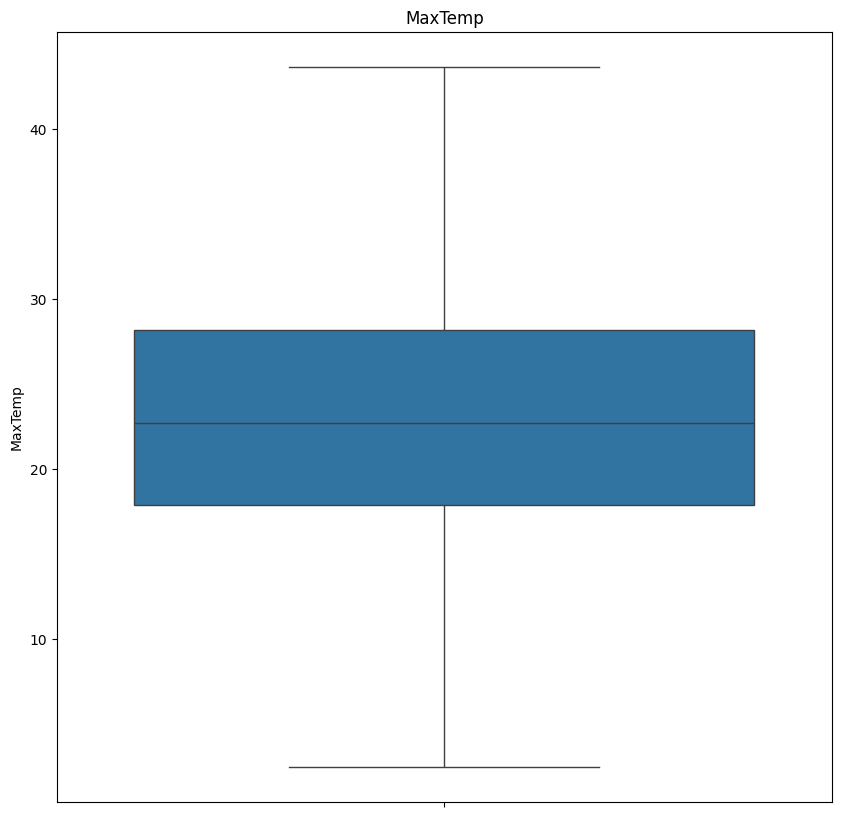

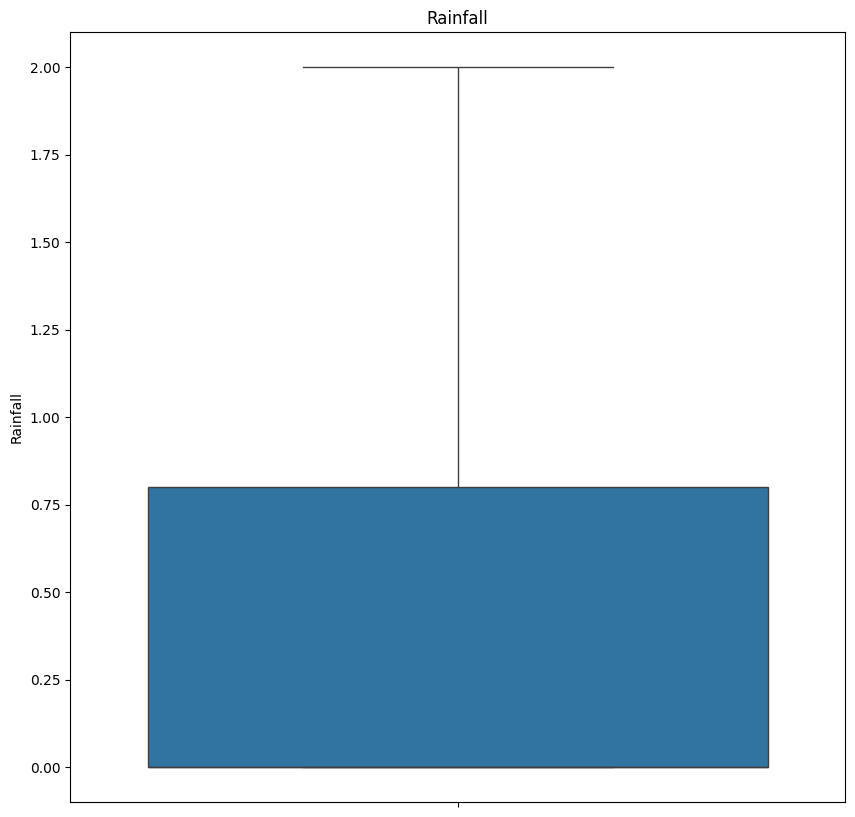

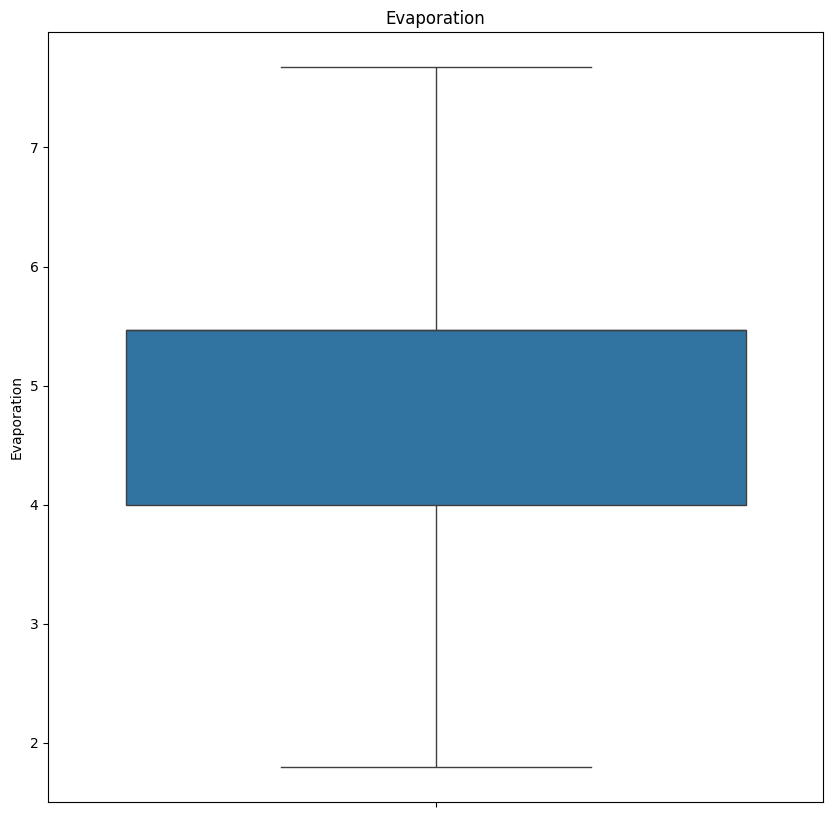

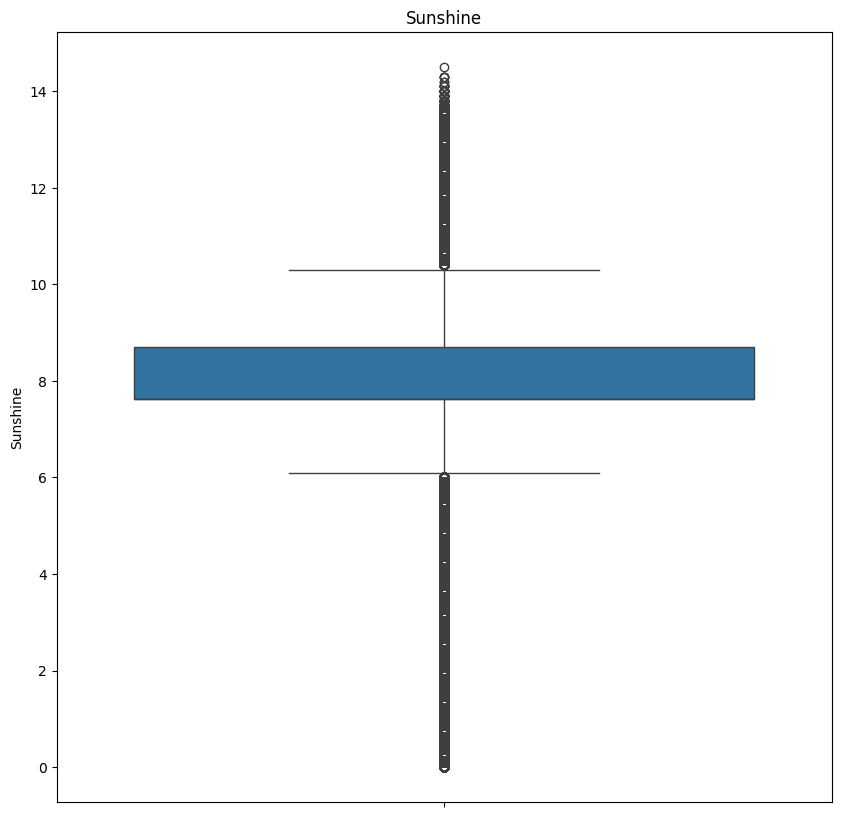

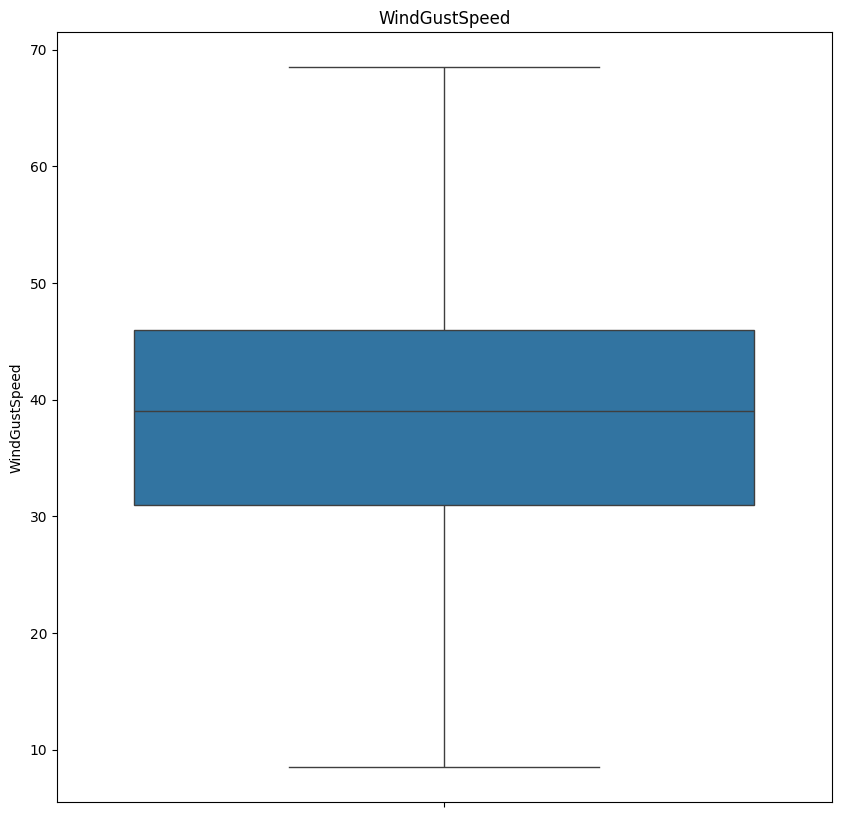

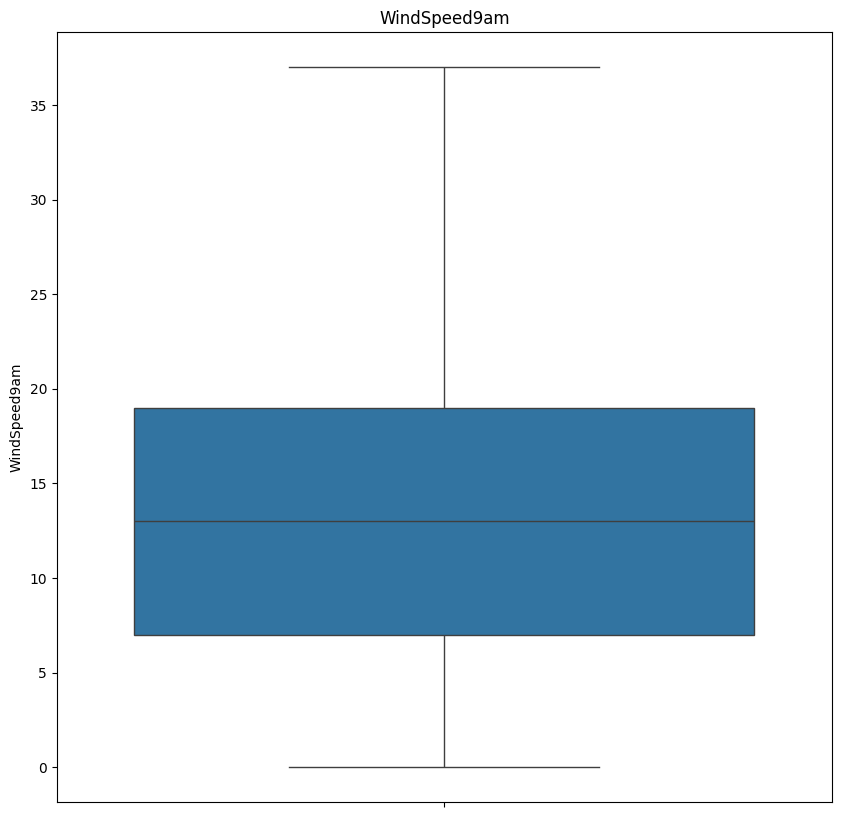

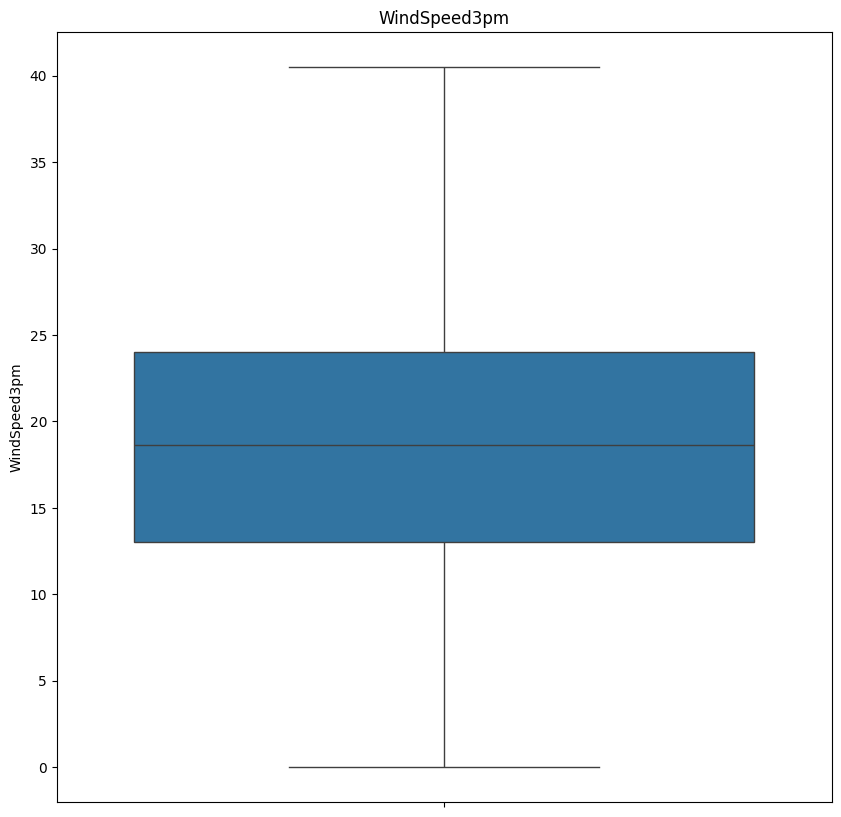

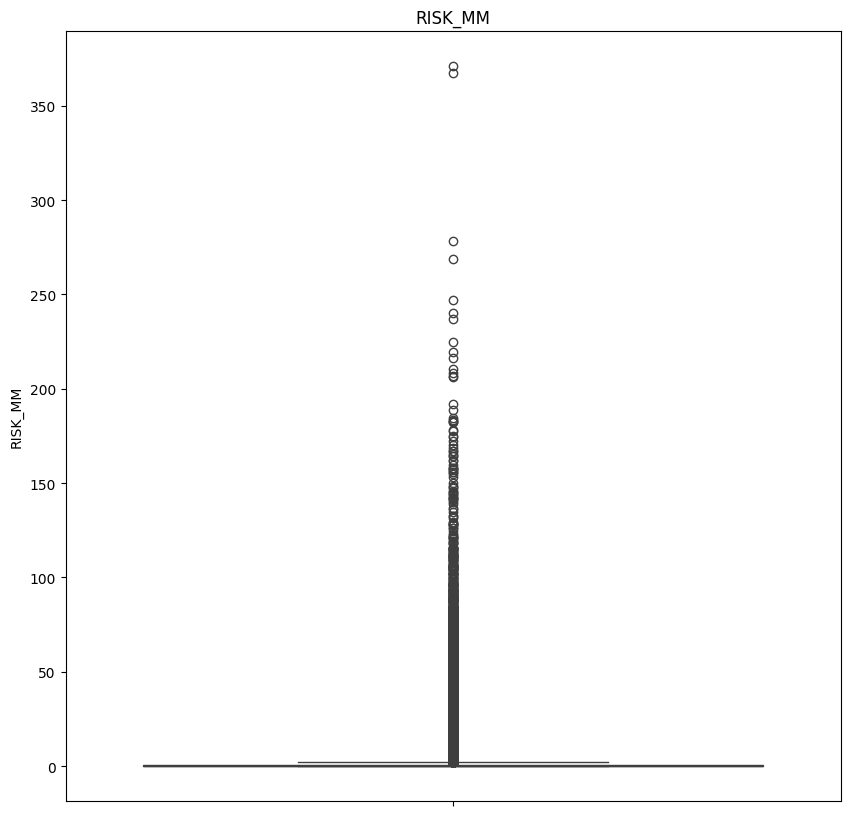

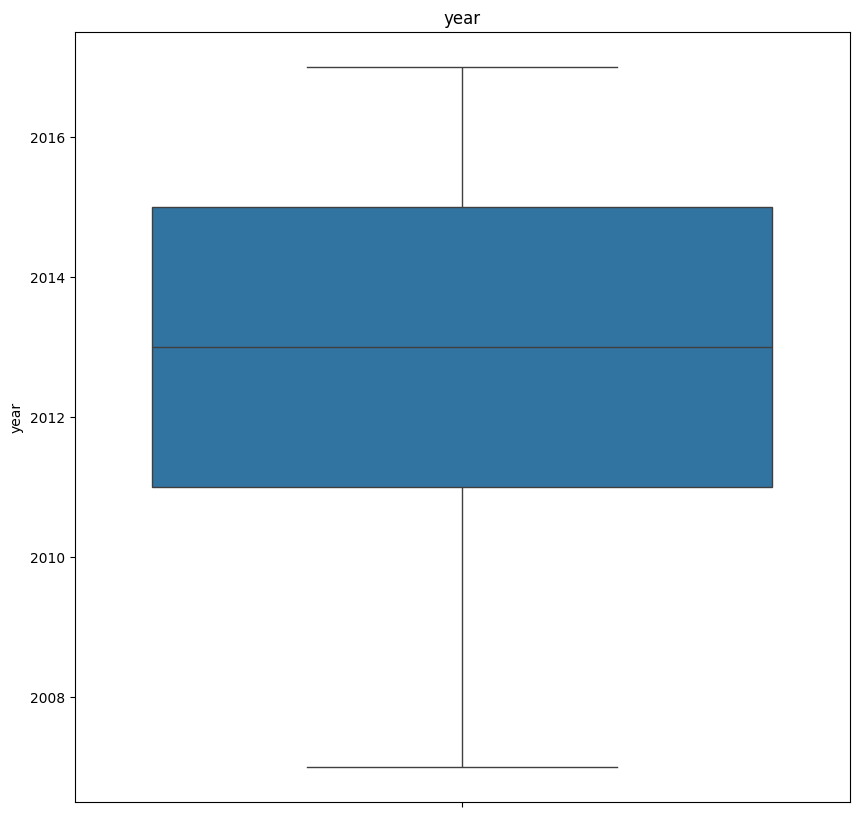

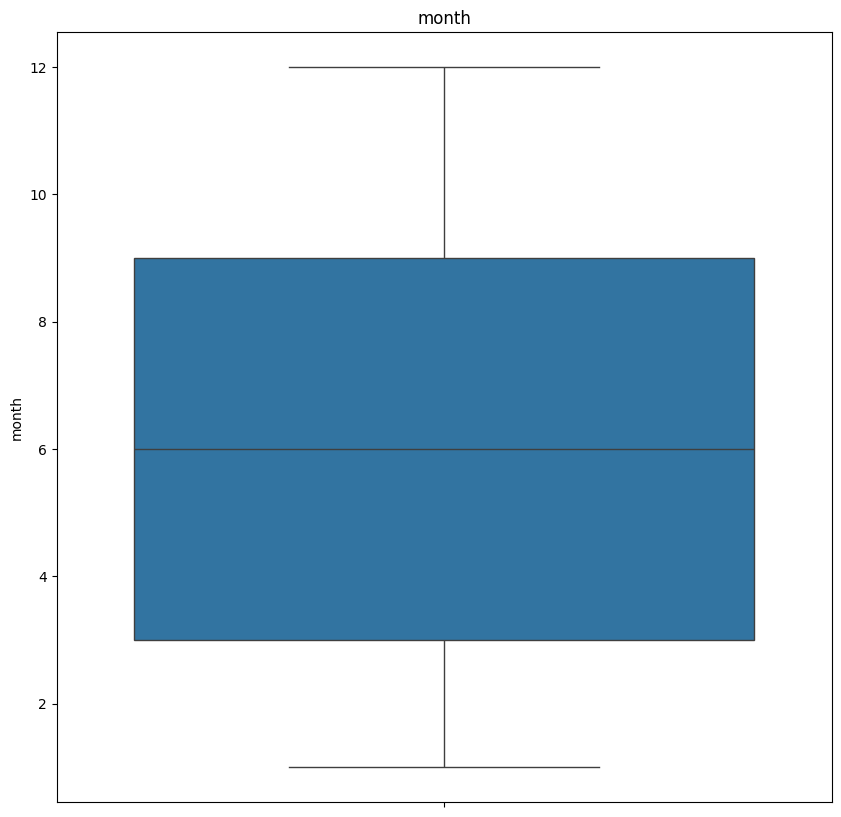

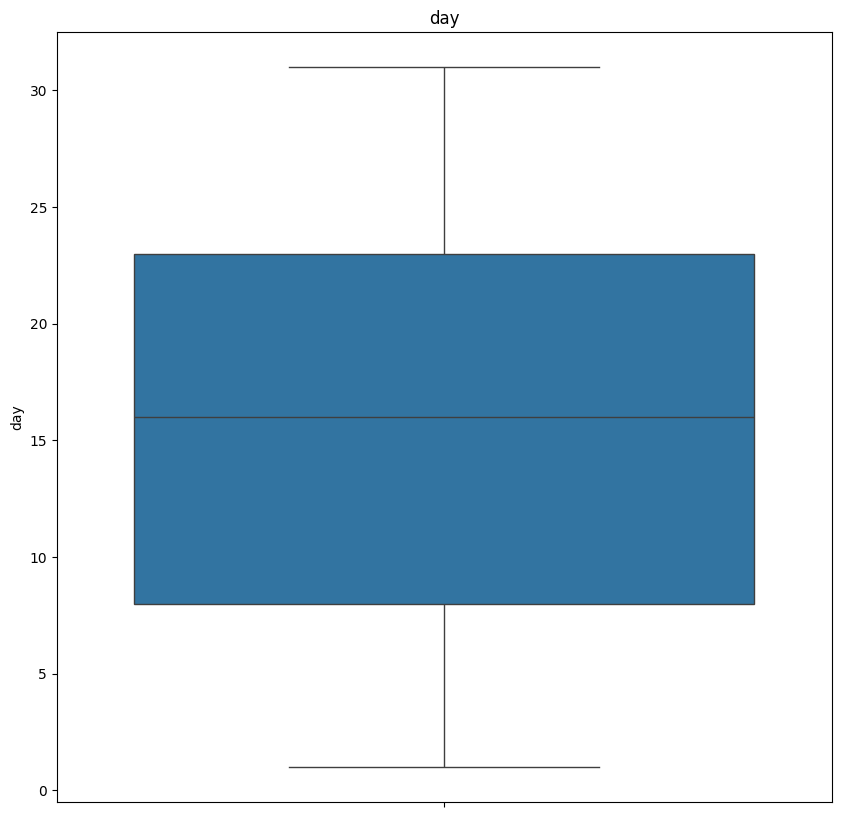

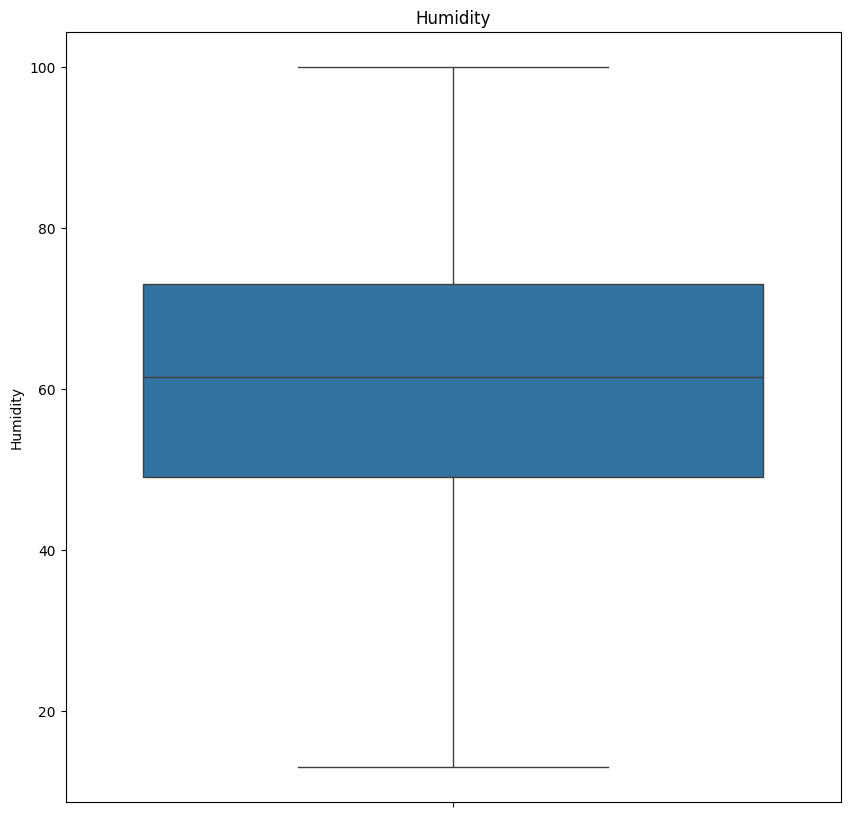

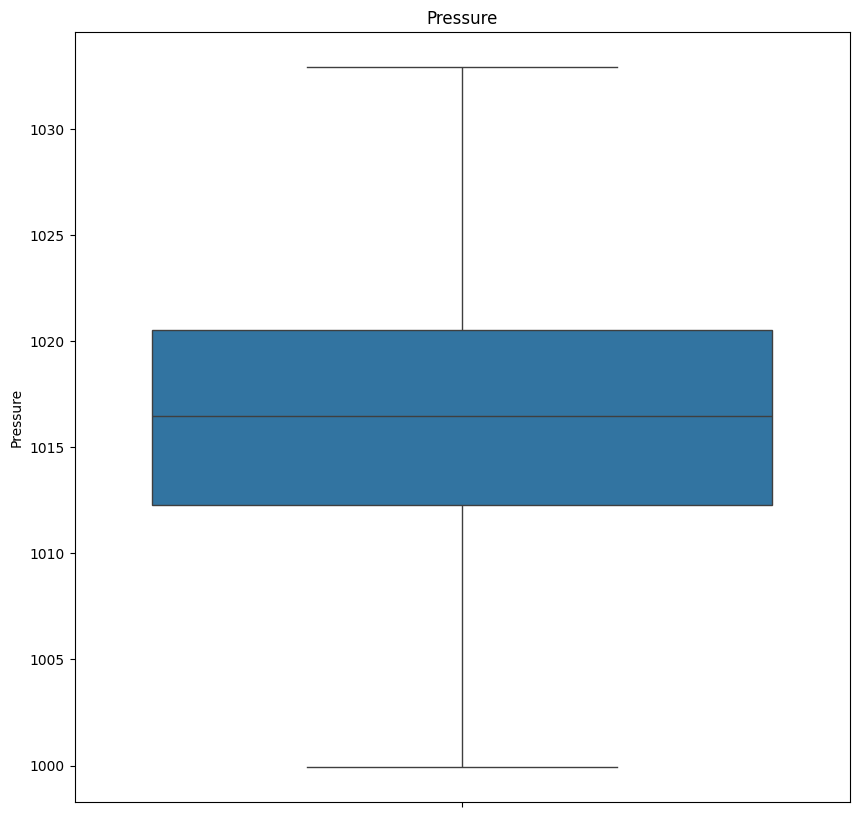

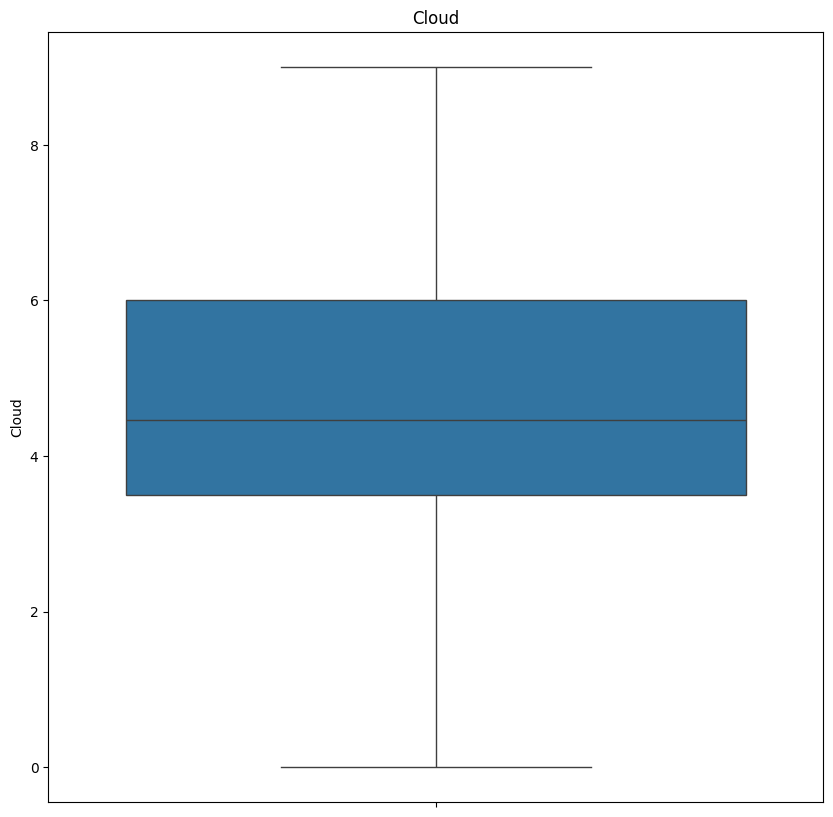

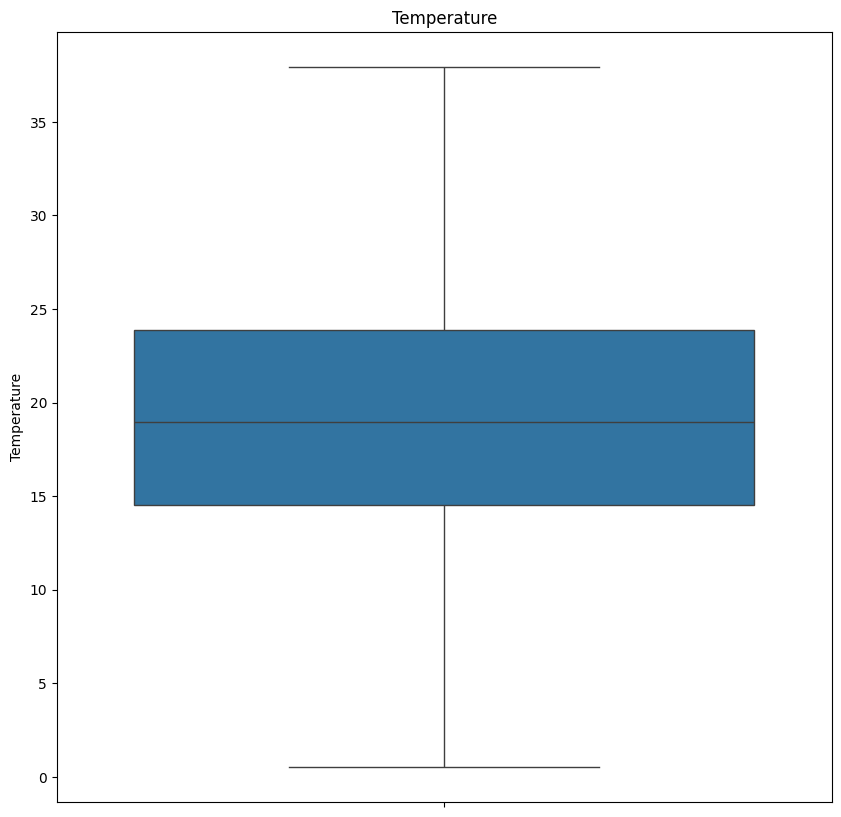

In [40]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(data_frame[feature])
    plt.title(feature)


Los histogramas muestran la distribución de las variables numéricas después de tratar los valores atípicos. Se observa que las distribuciones se encuentran más concentradas y no presentan valores extremos.


---

Observación: Existe colinealidad entre RISK_MM y RainTomorrow.

In [41]:
data_frame.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,RainToday,RISK_MM,RainTomorrow,year,month,day,Humidity,Pressure,Cloud,Temperature
0,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,No,0.0,No,2008,12,1,46.5,1007.40,8.000000,19.35
1,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,No,0.0,No,2008,12,2,34.5,1009.20,4.461558,20.75
2,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,No,0.0,No,2008,12,3,34.0,1008.15,2.000000,22.10
3,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,No,1.0,No,2008,12,4,30.5,1015.20,4.461558,22.30
4,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,No,0.2,No,2008,12,5,57.5,1008.40,7.500000,23.75


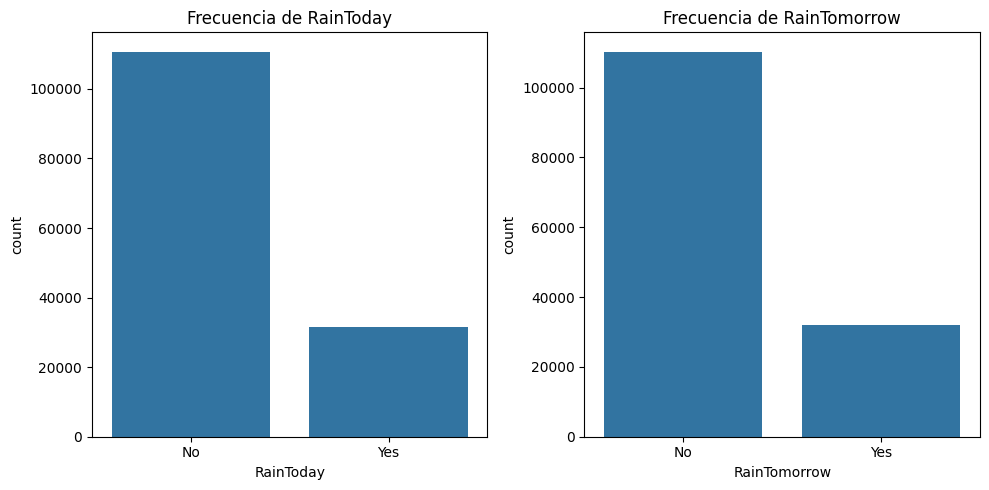


RainTomorrow:
 RainTomorrow
No     0.775819
Yes    0.224181
Name: proportion, dtype: float64
RainToday:
 RainToday
No     0.778787
Yes    0.221213
Name: proportion, dtype: float64


In [42]:
# Explorando las columnas RainTomorrow y RainToday

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='RainToday', data=data_frame)
plt.title('Frecuencia de RainToday')

plt.subplot(1, 2, 2)
sns.countplot(x='RainTomorrow', data=data_frame)
plt.title('Frecuencia de RainTomorrow')

plt.tight_layout()
plt.show()

#Frecuencia
print("\nRainTomorrow:\n", data_frame['RainTomorrow'].value_counts(normalize=True))

print("RainToday:\n", data_frame['RainToday'].value_counts(normalize=True))


**Análisis exploratorio**

COLUMNA: MinTemp


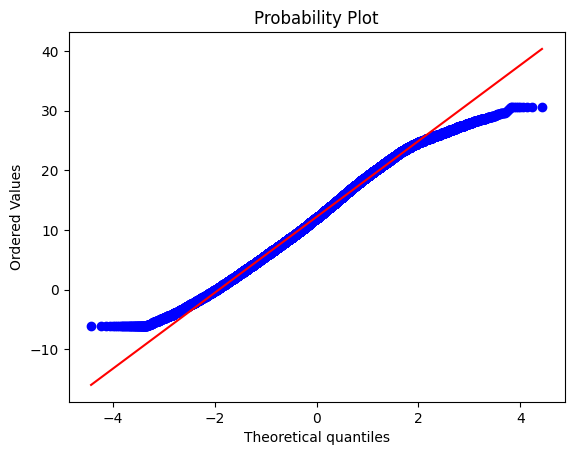

COLUMNA: MaxTemp


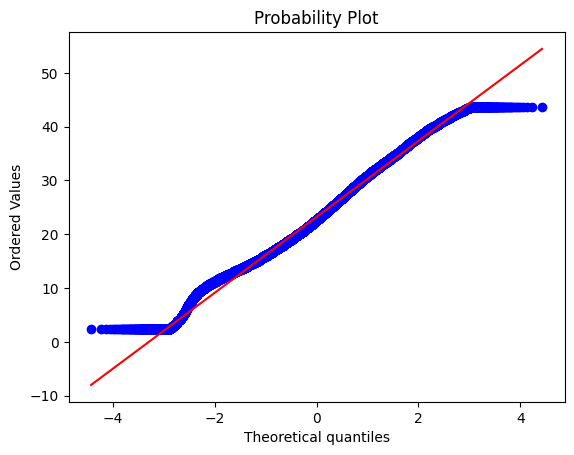

COLUMNA: Rainfall


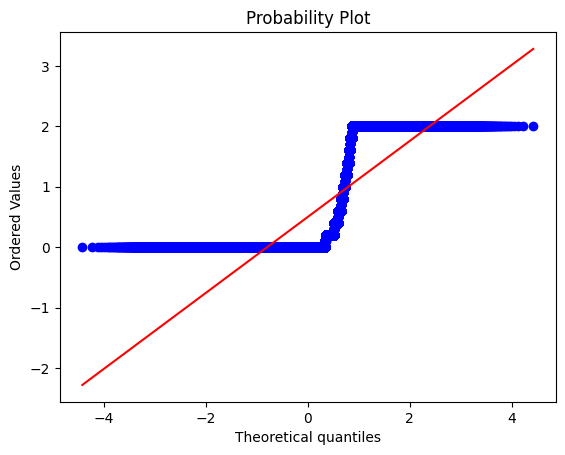

COLUMNA: Evaporation


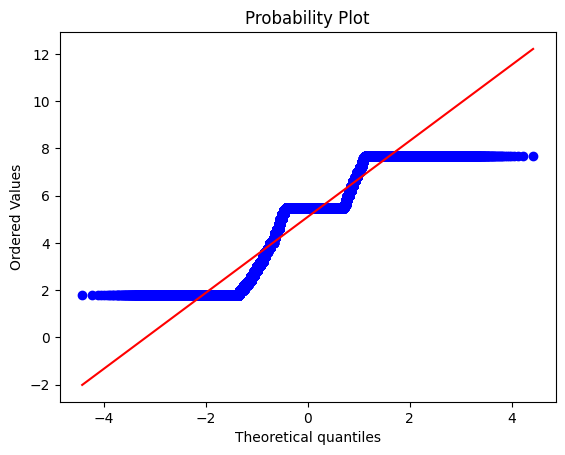

COLUMNA: Sunshine


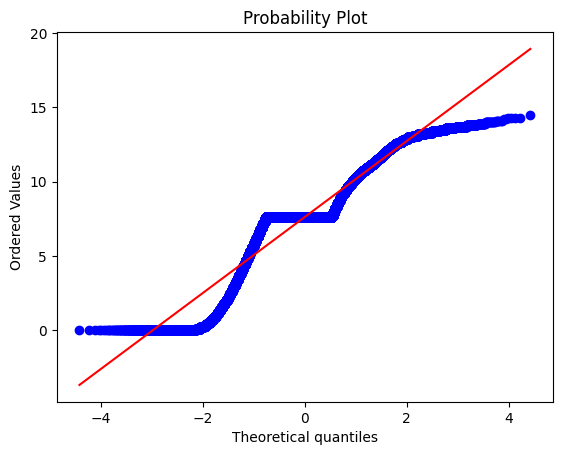

COLUMNA: WindGustSpeed


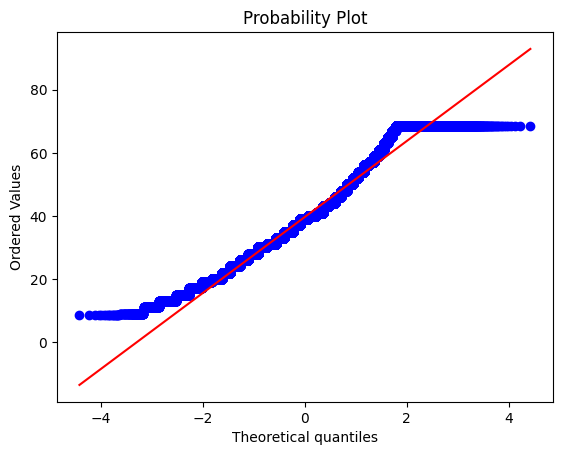

COLUMNA: WindSpeed9am


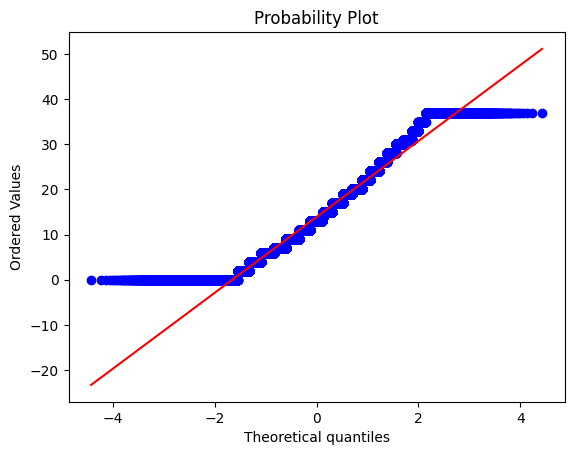

COLUMNA: WindSpeed3pm


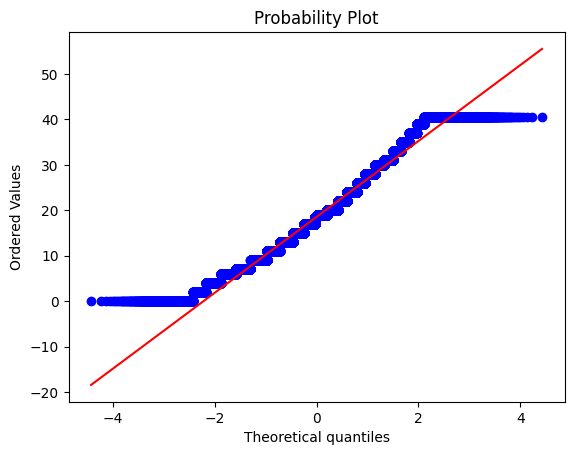

COLUMNA: RISK_MM


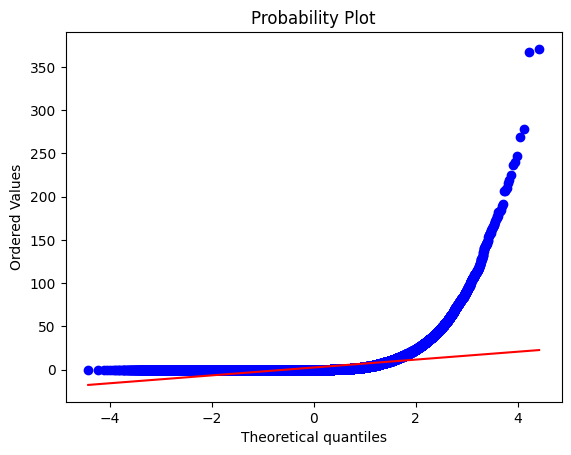

COLUMNA: year


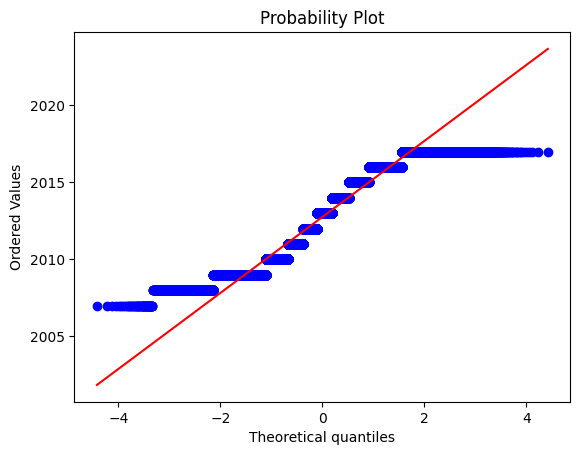

COLUMNA: month


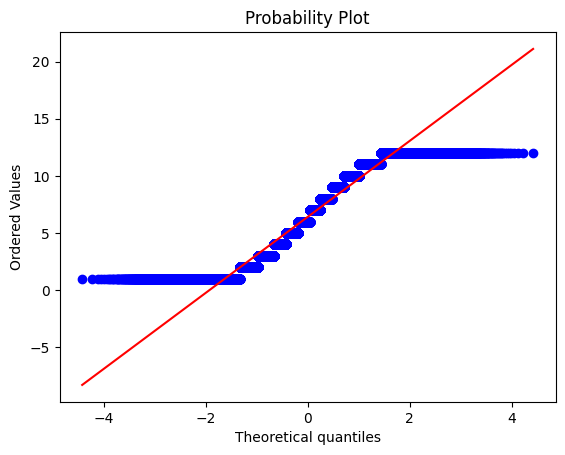

COLUMNA: day


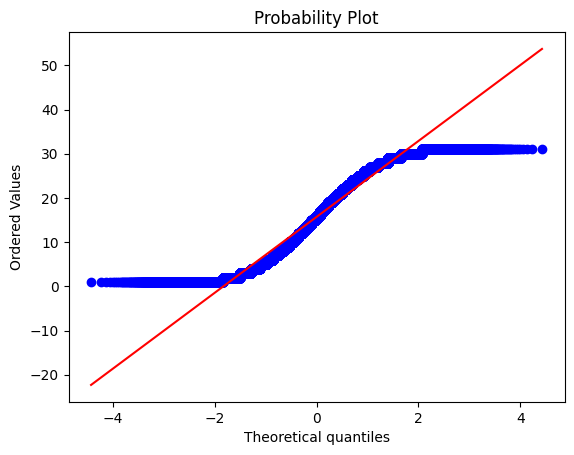

COLUMNA: Humidity


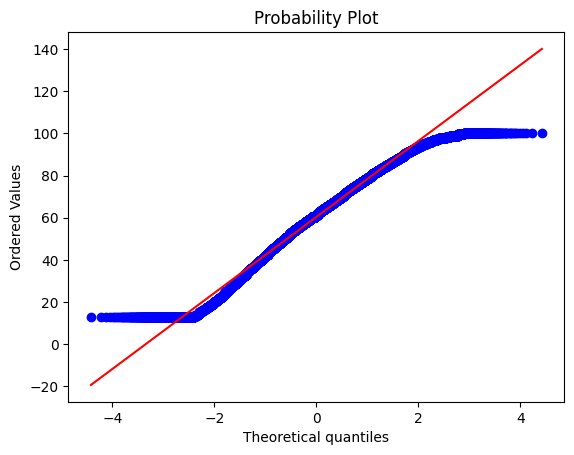

COLUMNA: Pressure


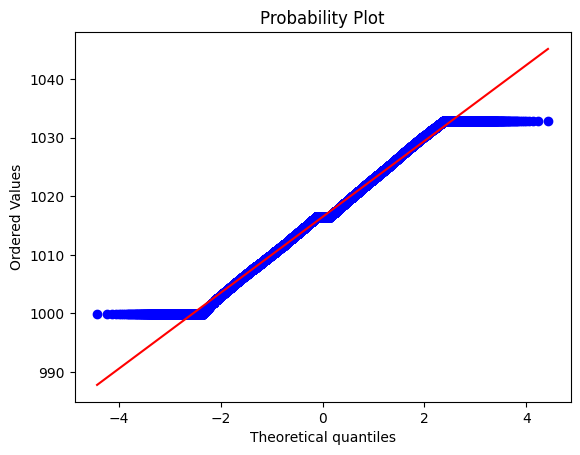

COLUMNA: Cloud


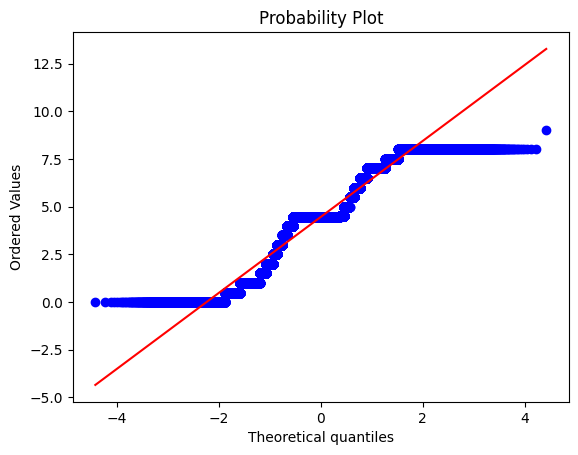

COLUMNA: Temperature


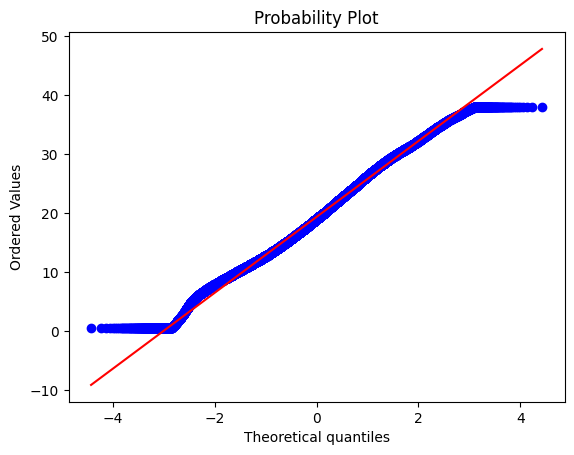

In [43]:
for feature in numerical_features:
    print("COLUMNA:", feature)
    stats.probplot(data_frame[feature], dist="norm", plot=plt)
    plt.show()

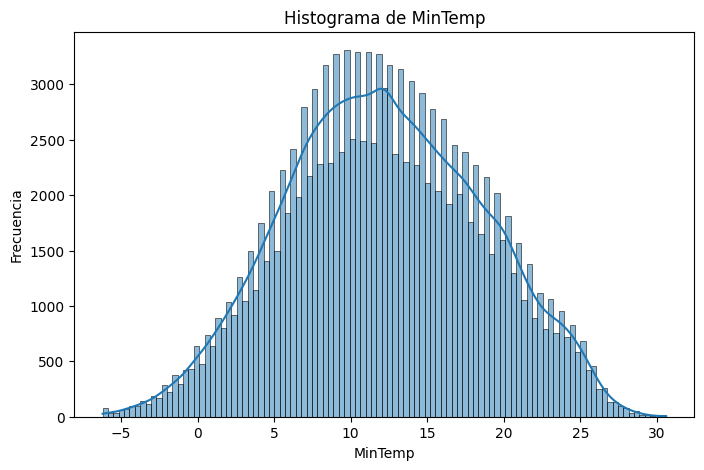

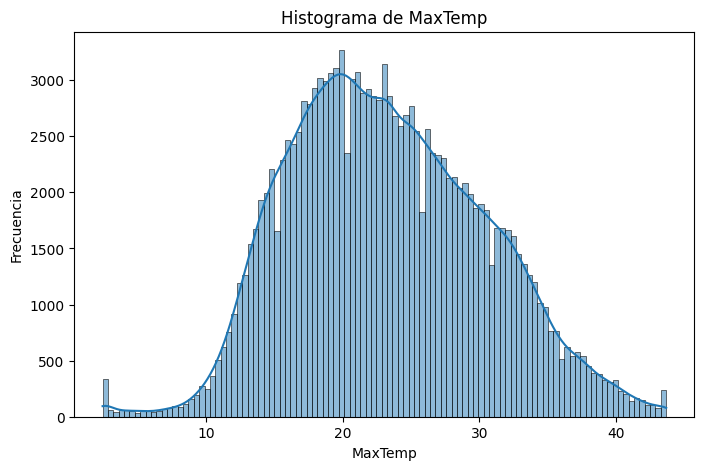

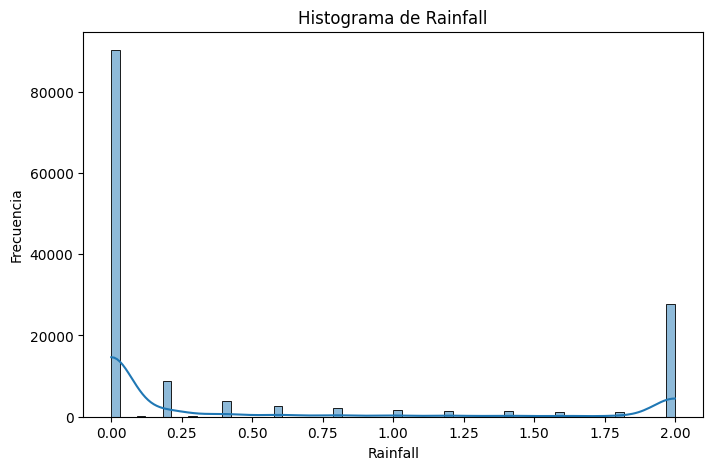

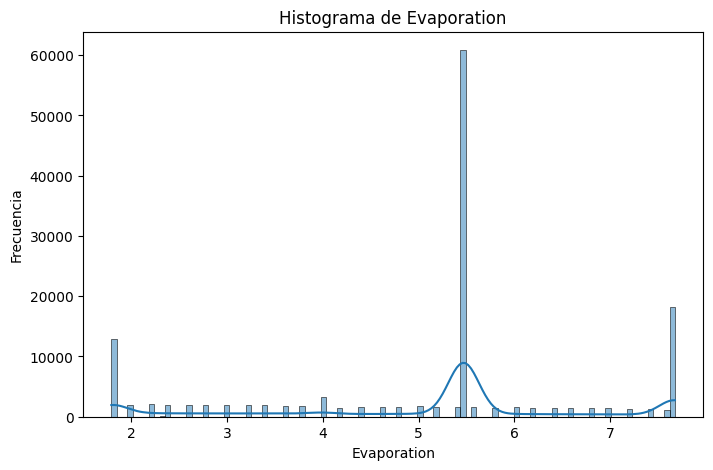

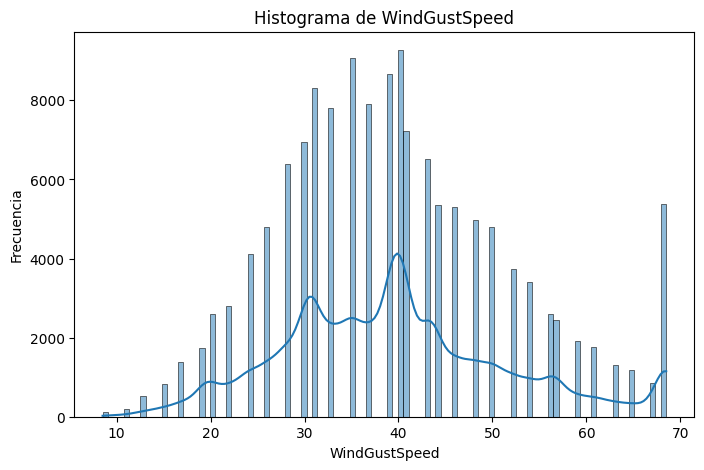

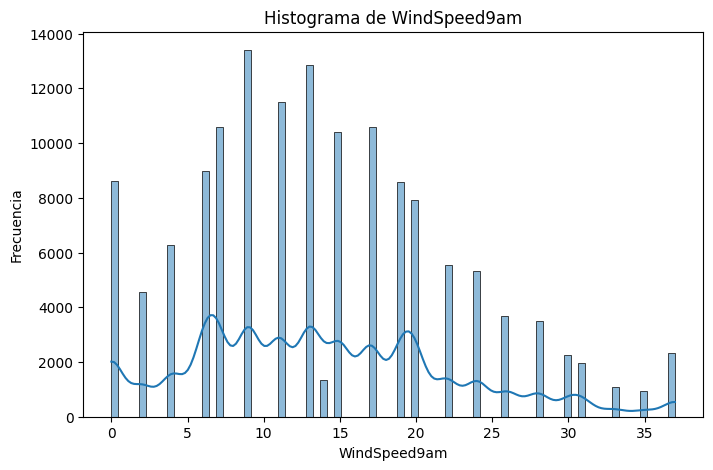

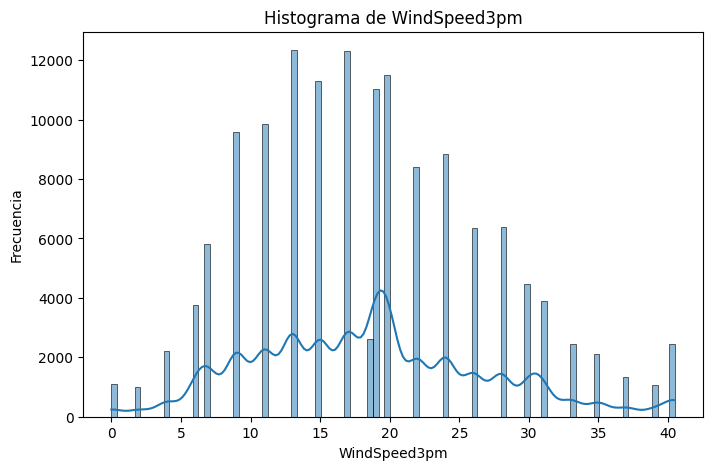

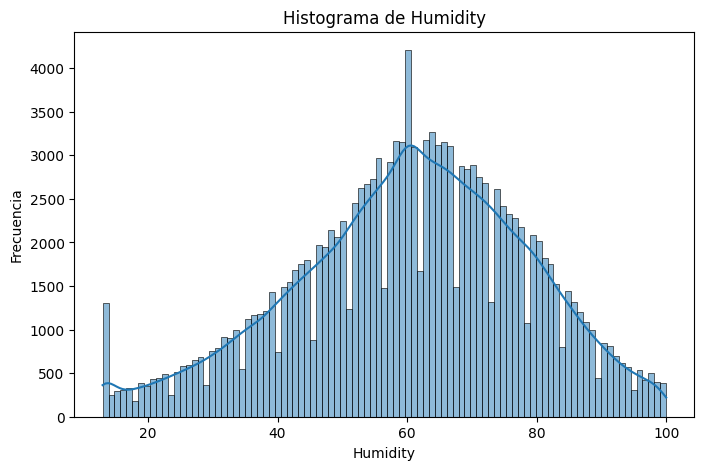

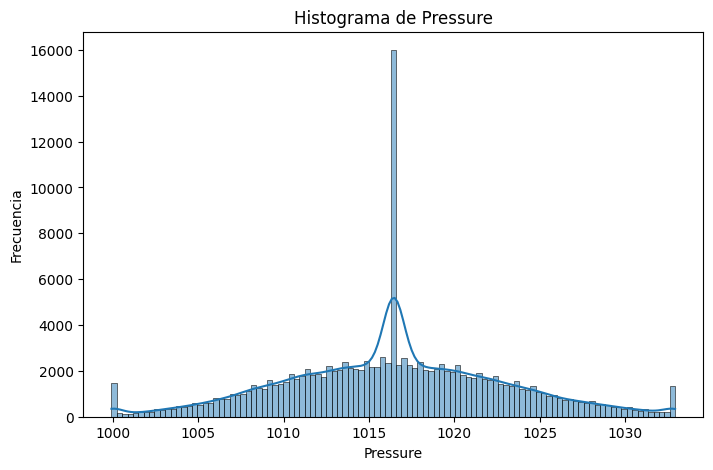

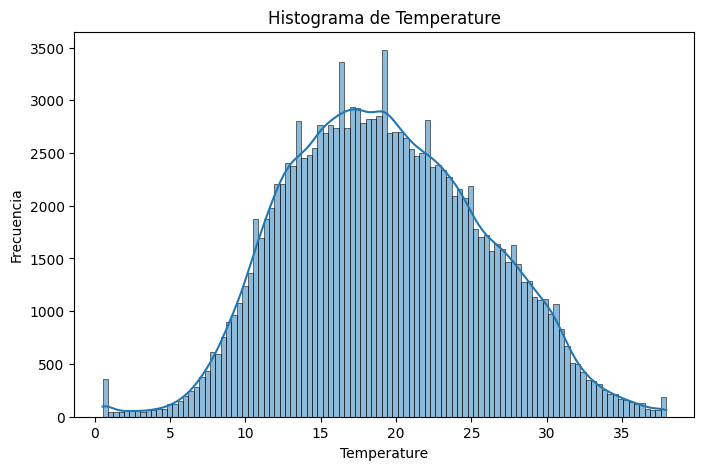

In [44]:
columnas_a_graficar = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity', 'Pressure', 'Temperature']


for columna in columnas_a_graficar:
    plt.figure(figsize=(8, 5))  # Tamaño del gráfico
    sns.histplot(data_frame[columna], kde=True)
    plt.title(f'Histograma de {columna}')  # Título del gráfico
    plt.xlabel(columna)  # Etiqueta del eje x
    plt.ylabel('Frecuencia') # Etiqueta del eje y
    plt.show()

Estos gráficos muestran distribuciones de diferentes variables meteorológicas y climáticas en forma de histogramas. Cada histograma representa la frecuencia de ocurrencia de los valores de una variable específica dentro de ciertos rangos
Los histogramas proporcionan una vista general de cómo se distribuyen los datos para cada variable, permitiendo identificar patrones, valores típicos, valores extremos y la forma general de la distribución
Las variables representadas incluyen temperatura mínima y máxima, precipitación, evaporación, horas de sol, velocidad del viento (a diferentes horas), humedad (a diferentes horas), presión atmosférica (a diferentes horas), nubosidad (a diferentes horas) y temperatura (a diferentes horas)

**Si no cumplen con la distribucion normal se debe considerar en tranformar las columnas según las caracteristicas de su distribución.**

## Columnas irrelevantes para el análisis

In [45]:

data_frame.drop(['WindGustSpeed', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Sunshine',
                 'RainToday', 'RISK_MM'], axis=1, inplace=True)

## Codificación de tipo de datos

In [46]:
# Codificación de características categóricas mediante la función de reemplazo:

data_frame['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [47]:
data_frame.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,RainTomorrow,year,month,day,Humidity,Pressure,Cloud,Temperature
0,Albury,13.4,22.9,0.6,5.469824,0,2008,12,1,46.5,1007.40,8.000000,19.35
1,Albury,7.4,25.1,0.0,5.469824,0,2008,12,2,34.5,1009.20,4.461558,20.75
2,Albury,12.9,25.7,0.0,5.469824,0,2008,12,3,34.0,1008.15,2.000000,22.10
3,Albury,9.2,28.0,0.0,5.469824,0,2008,12,4,30.5,1015.20,4.461558,22.30
4,Albury,17.5,32.3,1.0,5.469824,0,2008,12,5,57.5,1008.40,7.500000,23.75


In [48]:
# Dataframe para no supervisado
df_ml = data_frame.copy()

# **Transformación de Datos (Data Transformations)**

* Esta fase se enfoca en modificar los datos para que sean más adecuados para el modelado, evitando problemas como overfitting (sobreajuste) o underfitting (subajuste).

### Estandarización de Datos



**Temperatura:**

* 'MinTemp': Temperatura mínima.
* 'MaxTemp': Temperatura máxima.
* 'Temperature': Temperatura media.

**Razón:** Las temperaturas se miden en grados Celsius, y es importante escalarlas para que tengan un rango similar.


---


**Presión:**

* 'Pressure': Presión atmosférica media.

**Razón:** La presión se mide en hectopascales. Escalar esta variable ayuda a prevenir que domine los resultados del modelo.


---


**Evaporación:**

* 'Evaporation': Evaporación en milímetros.

**Razón:** Escalar esta variable es útil para que no tenga una influencia desproporcionada en comparación con otras características.

---

**Nubosidad:**

* 'Cloud': Fracción del cielo cubierta por nubes (de 0 a 8 octavos).

**Razón:** Aunque este rango es limitado, escalar puede ser beneficioso en algunos casos.

In [49]:
# Columnas a escalar
columnas_a_escalar = ['MinTemp', 'MaxTemp', 'Evaporation', 'Cloud', 'Pressure', 'Temperature']

scaler = StandardScaler()

# Ajusta el escalador a las columnas seleccionadas
scaler.fit(data_frame[columnas_a_escalar])

# Transforma las columnas con el escalador
data_frame[columnas_a_escalar] = scaler.transform(data_frame[columnas_a_escalar])


print(data_frame.head())

  Location   MinTemp   MaxTemp  Rainfall  Evaporation  RainTomorrow  year  \
0   Albury  0.189954 -0.046523       0.6     0.217976             0  2008   
1   Albury -0.749314  0.263687       0.0     0.217976             0  2008   
2   Albury  0.111681  0.348290       0.0     0.217976             0  2008   
3   Albury -0.467534  0.672601       0.0     0.217976             0  2008   
4   Albury  0.831787  1.278921       1.0     0.217976             0  2008   

   month  day  Humidity  Pressure         Cloud  Temperature  
0     12    1      46.5 -1.393365  1.711823e+00     0.004110  
1     12    2      34.5 -1.117002  4.296817e-16     0.220842  
2     12    3      34.0 -1.278214 -1.190849e+00     0.429833  
3     12    4      30.5 -0.195793  4.296817e-16     0.460795  
4     12    5      57.5 -1.239830  1.469933e+00     0.685267  


**Matriz de correlación**

Text(0.5, 1.0, 'Matriz de Correlación')

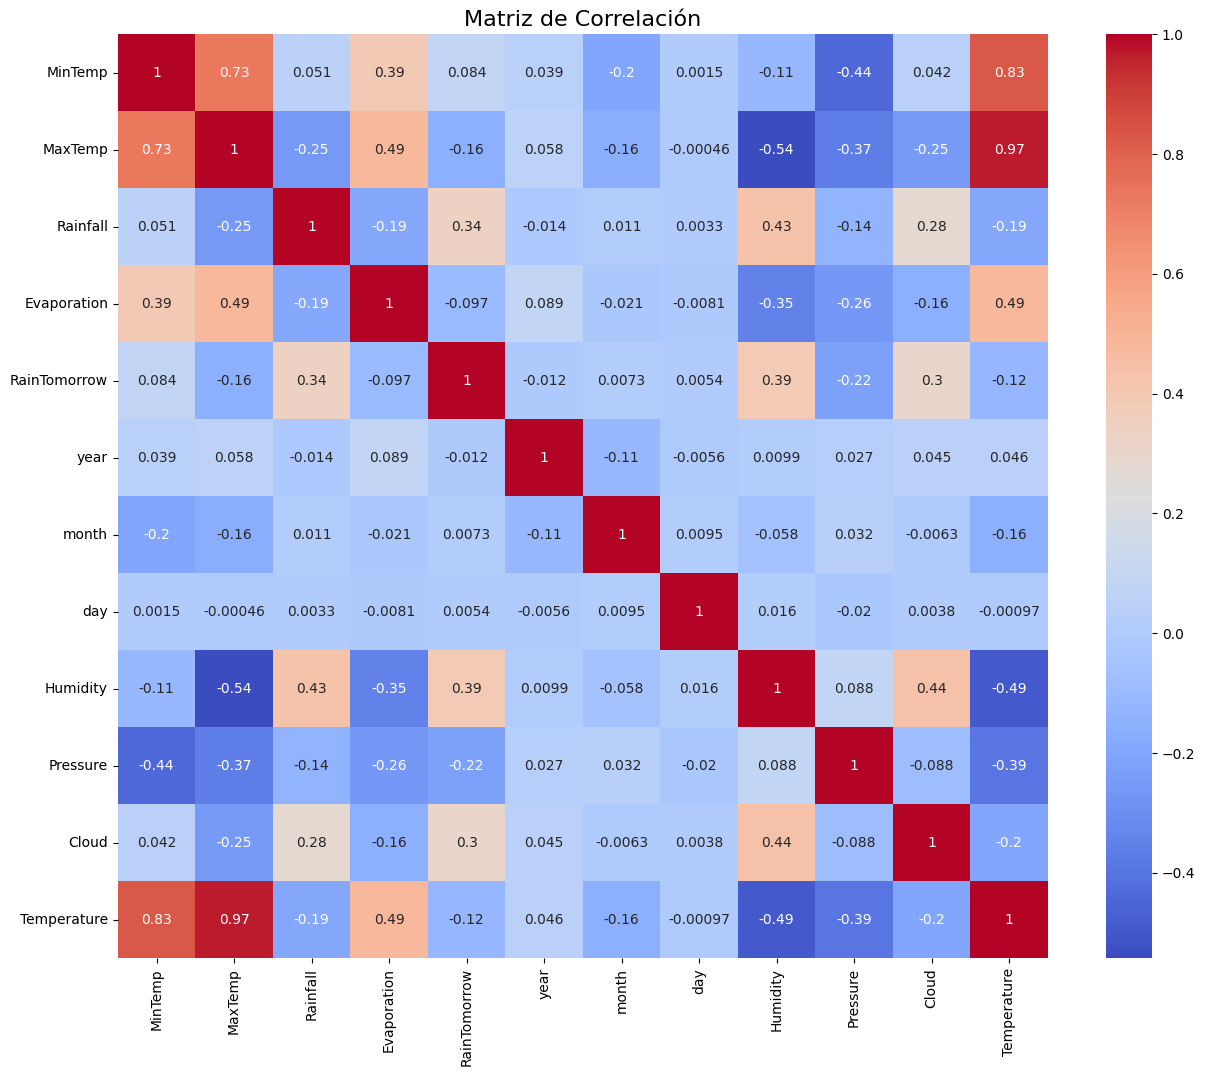

In [50]:
corr_matrix = data_frame.iloc[:, 1:].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación', fontsize=16)

* 1: Correlación positiva perfecta (cuando una variable aumenta, la otra también lo hace).
* 0: No hay correlación (no hay relación lineal entre las variables).
* -1: Correlación negativa perfecta (cuando una variable aumenta, la otra disminuye).

**Interpretación de la matriz:**

**Temperatura:**

MinTemp y MaxTemp tienen una fuerte correlación positiva (0.97), lo que indica que los días con temperaturas mínimas altas también suelen tener temperaturas máximas altas.

Temperature está altamente correlacionada con MinTemp (0.83) y MaxTemp (0.97), lo que sugiere que es un buen indicador de la temperatura general del día.

Las temperaturas (MinTemp, MaxTemp, Temperature) tienen una correlación negativa moderada con Humidity (alrededor de -0.5), lo que significa que los días más cálidos tienden a ser menos húmedos.

**Lluvia:**

Rainfall y RainTomorrow tienen una correlación positiva moderada (0.33), lo que indica que la lluvia de hoy está relacionada con la probabilidad de lluvia mañana.
Rainfall tiene una correlación negativa débil con MaxTemp (-0.26), lo que sugiere que los días más calurosos tienden a tener menos lluvia.

**Otras variables:**

Evaporation tiene una correlación positiva moderada con MaxTemp (0.51) y Temperature (0.5), lo que indica que la evaporación aumenta con la temperatura.

Humidity tiene una correlación positiva moderada con Cloud (0.44) y Rainfall (0.44), lo que sugiere que los días más húmedos tienden a ser más nublados y lluviosos.

Pressure tiene una correlación negativa moderada con Humidity (-0.49) y Temperature (-0.39), lo que indica que la presión más alta se asocia con menor humedad y temperaturas más bajas.





# **Modelado de Datos**

In [51]:
filas = data_frame.shape[0]
columnas = data_frame.shape[1]

print(" ")
print("Número de filas:", filas)
print("Número de columnas:", columnas)
print(" ")
data_frame.head()

 
Número de filas: 142193
Número de columnas: 13
 


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,RainTomorrow,year,month,day,Humidity,Pressure,Cloud,Temperature
0,Albury,0.189954,-0.046523,0.6,0.217976,0,2008,12,1,46.5,-1.393365,1.711823e+00,0.004110
1,Albury,-0.749314,0.263687,0.0,0.217976,0,2008,12,2,34.5,-1.117002,4.296817e-16,0.220842
2,Albury,0.111681,0.348290,0.0,0.217976,0,2008,12,3,34.0,-1.278214,-1.190849e+00,0.429833
3,Albury,-0.467534,0.672601,0.0,0.217976,0,2008,12,4,30.5,-0.195793,4.296817e-16,0.460795
4,Albury,0.831787,1.278921,1.0,0.217976,0,2008,12,5,57.5,-1.239830,1.469933e+00,0.685267


In [52]:
selected_columns = data_frame[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                                'Humidity', 'Pressure', 'Cloud', 'Temperature']]
# Variables
X = selected_columns

Y = data_frame['RainTomorrow']



X.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Humidity,Pressure,Cloud,Temperature
count,1.421930e+05,1.421930e+05,142193.000000,1.421930e+05,142193.000000,1.421930e+05,1.421930e+05,1.421930e+05
mean,-2.238670e-16,5.404788e-16,0.500696,-4.285453e-16,60.354799,1.836029e-14,5.308845e-16,1.854898e-16
std,1.000004e+00,1.000004e+00,0.802046,1.000004e+00,18.126042,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.878321e+00,-2.930070e+00,0.000000,-1.922855e+00,13.000000,-2.541039e+00,-2.158406e+00,-2.910156e+00
25%,-7.180054e-01,-7.515468e-01,0.000000,-6.383560e-01,49.000000,-6.410441e-01,-4.651812e-01,-7.389696e-01
50%,-2.920894e-02,-7.472407e-02,0.000000,2.179765e-01,61.500000,-3.032761e-03,4.296817e-16,-5.781298e-02
75%,7.222053e-01,7.008020e-01,0.800000,2.179765e-01,73.000000,6.256191e-01,7.442653e-01,7.084882e-01
max,2.882521e+00,2.879325e+00,2.000000,1.502475e+00,100.000000,2.525614e+00,2.195601e+00,2.879675e+00


Muestra de entrenamiento

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=0 )

## **Supervisados**

### **Clasificación** (RainTomorrow)

Árbol de decisión

In [54]:
tree = DecisionTreeClassifier(max_depth=4)

tree_rain = tree.fit(X_train, Y_train)

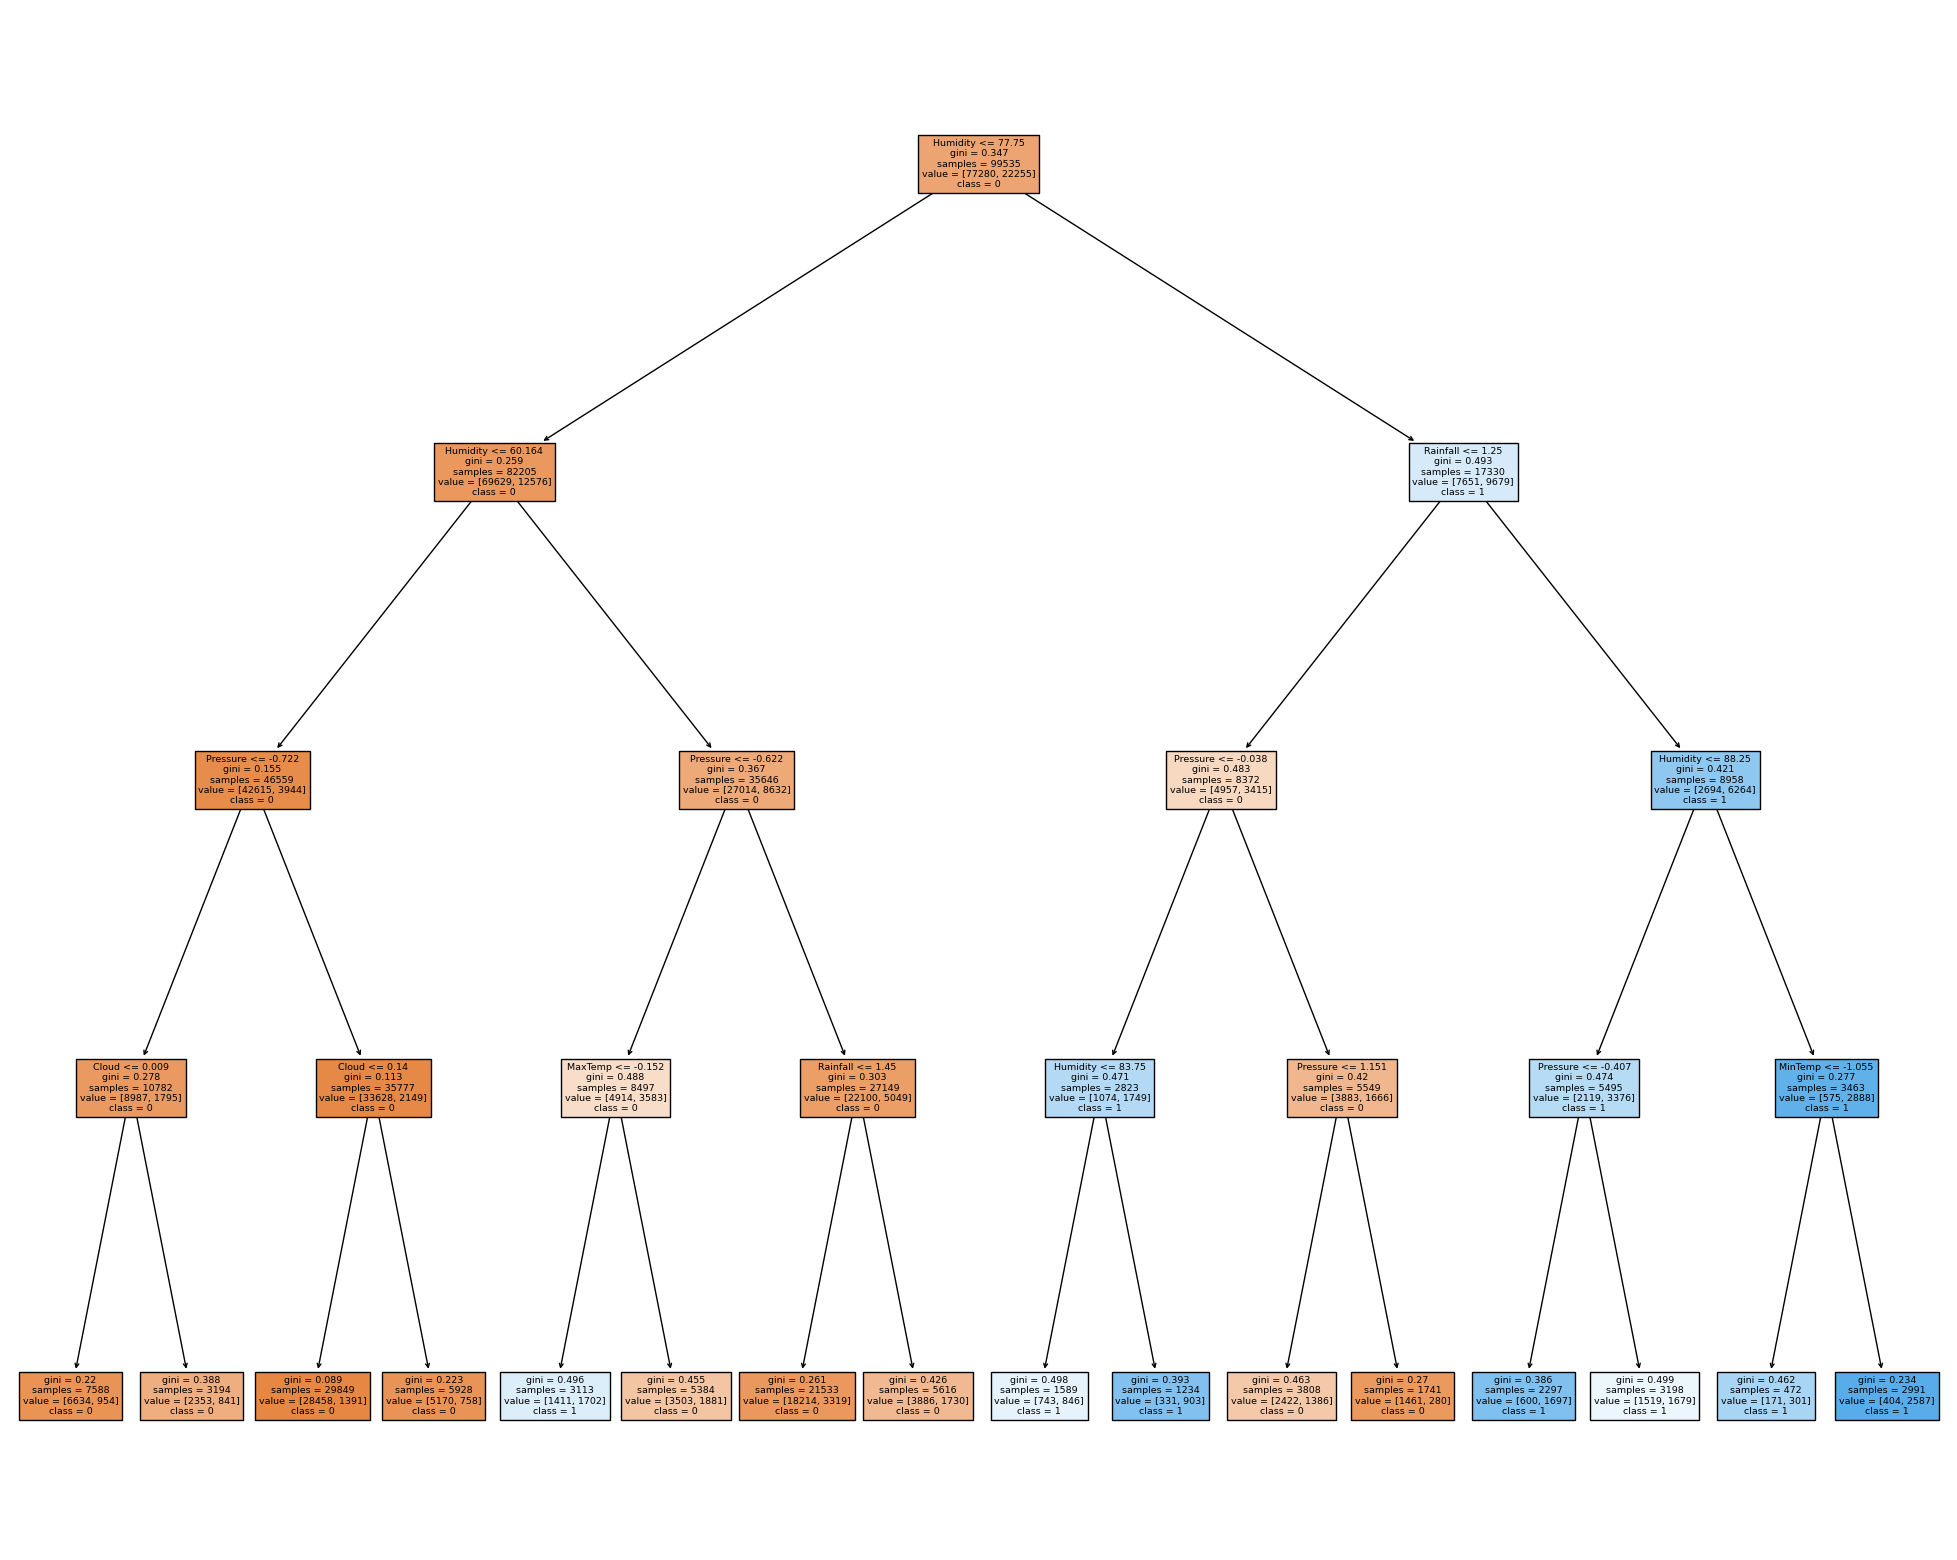

In [55]:
from sklearn import tree

fig = plt.figure(figsize=(25, 20))
# Covertir nombre de clases a string
class_names_str = [str(x) for x in Y.unique()]
tree.plot_tree(tree_rain, feature_names=list(X.columns), class_names=class_names_str, filled=True)

plt.show()

* RainTomorrow(class) = 0 quiere decir que no lloverá.
* RainTomorrow(class) = 1 quiere decir que sí lloverá.

---

- Nodo Raíz (Humidity <= 82.15): La humedad es el factor más importante para predecir la lluvia. Si la humedad es menor o igual a 82.15%, es menos probable que llueva (clase 0), y el árbol sigue por la rama izquierda. Si la humedad es mayor a 82.15%, es más probable que llueva (clase 1), y el árbol sigue por la rama derecha.

- Rama Izquierda (Humedad Baja): Pressure <= 1013.55: Si la presión atmosférica es baja, la probabilidad de lluvia aumenta ligeramente, pero sigue siendo más probable que no llueva.
Pressure > 1013.55: Si la presión es alta, es muy probable que no llueva.
- Rama Derecha (Humedad Alta): Rainfall <= 0.85: Si la cantidad de lluvia es baja, la probabilidad de lluvia aumenta significativamente, pero sigue siendo más probable que no llueva.
Rainfall > 0.85: Si la cantidad de lluvia es alta, es muy probable que llueva.

**Observaciones:**

Variables más importantes: La humedad y la cantidad de lluvia son los factores más significativos para predecir la lluvia en este modelo. La presión atmosférica también juega un papel, pero en menor medida.
Umbrales: Los valores de corte (82.15 para humedad, 1013.55 para presión, 0.85 para lluvia) son relevantes para entender cómo el modelo toma decisiones.

Probabilidades: Las hojas finales muestran la probabilidad de lluvia en cada escenario. Por ejemplo, si la humedad es baja y la presión alta, la probabilidad de lluvia es solo del 6.9%.



              precision    recall  f1-score   support

           0       0.85      0.93      0.89     33036
           1       0.65      0.43      0.52      9622

    accuracy                           0.82     42658
   macro avg       0.75      0.68      0.70     42658
weighted avg       0.80      0.82      0.80     42658

Precisión del modelo: 81.91195086501946 %
Matriz de confusión:


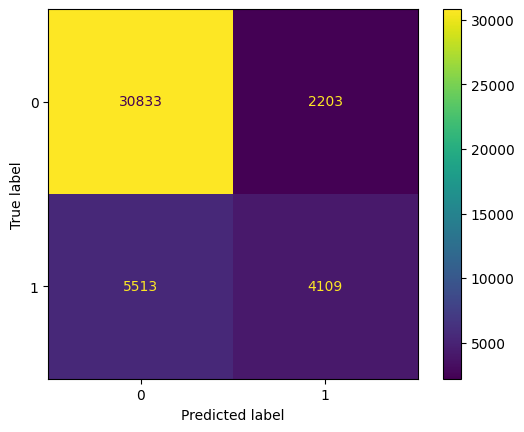

In [56]:
# Evaluacion de arbol de decision
# Realiza predicciones en los datos de prueba
Y_pred = tree_rain.predict(X_test)
print(classification_report(Y_test, Y_pred))
# Evalúa el modelo
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión del modelo:", accuracy *100, "%")

# Muestra la matriz de confusión
confusion_mat = confusion_matrix(Y_test, Y_pred)
print("Matriz de confusión:")
ConfusionMatrixDisplay(confusion_mat).plot()

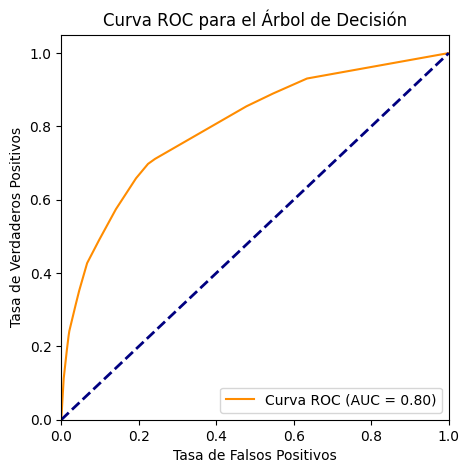

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de la clase positiva
probs = tree_rain.predict_proba(X_test)[:, 1]

# Calcular las métricas ROC y AUC-ROC
fpr, tpr, thresholds = roc_curve(Y_test, probs)
auc = roc_auc_score(Y_test, probs)

# Graficar la curva ROC
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', label="Curva ROC (AUC = %0.2f)" % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC para el Árbol de Decisión")
plt.legend(loc="lower right")
plt.show()


Regresión Logística

Precisión del modelo (Regresión Logística): 82.46518824136153 %

Matriz de confusión (Regresión Logística):


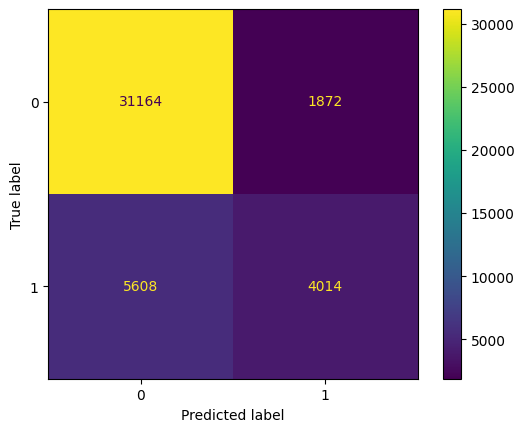

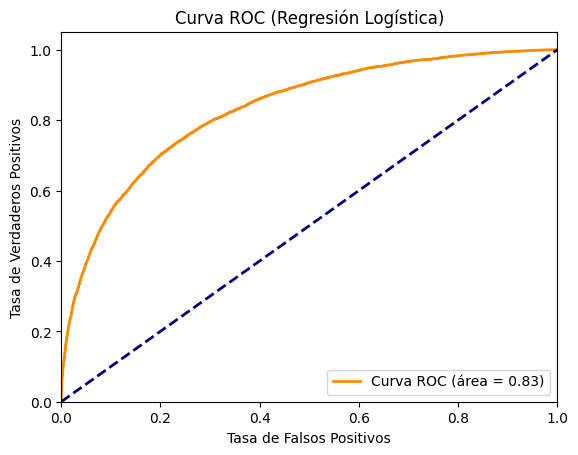

AUC-ROC (Regresión Logística): 0.83


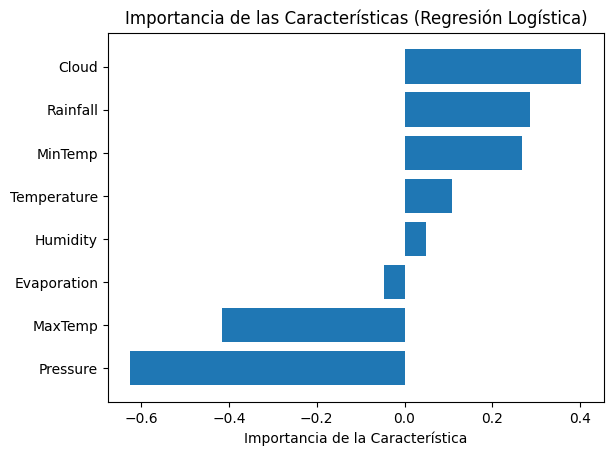

In [58]:
#Regresión Logística

# Entrenamiento
logistic = LogisticRegression()
logistic_rain = logistic.fit(X_train, Y_train)

# Predicciones
# Evaluación
Y_pred_logistic = logistic_rain.predict(X_test)
accuracy_logistic = accuracy_score(Y_test, Y_pred_logistic)
print("Precisión del modelo (Regresión Logística):", accuracy_logistic*100, "%")

# Obtener las probabilidades de la clase positiva
Y_prob_logistic = logistic_rain.predict_proba(X_test)[:, 1]

# Matriz de Confusión
confusion_mat_logistic = confusion_matrix(Y_test, Y_pred_logistic)
print("\nMatriz de confusión (Regresión Logística):")
ConfusionMatrixDisplay(confusion_mat_logistic).plot()

# Curva ROC y AUC-ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob_logistic)
roc_auc_logistic = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Regresión Logística)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC-ROC (Regresión Logística): {roc_auc_logistic:.2f}")

# Importancia de las características
importance = logistic_rain.coef_[0]

# Ordenar las características por importancia
feature_names = X.columns
sorted_idx = importance.argsort()
plt.barh(feature_names[sorted_idx], importance[sorted_idx])
plt.xlabel('Importancia de la Característica')
plt.title('Importancia de las Características (Regresión Logística)')
plt.show()

In [59]:
print("*Primeras 10 predicciones:", Y_pred_logistic[:10]) # Predicciones
print("*Primeros 10 valores reales:", Y_test[:10].values) # Valores reales

# Crear un DataFrame con las predicciones y los valores reales
resultados_log = pd.DataFrame({'Real': Y_test, 'Predicción': Y_pred_logistic})
print(resultados_log)


print("\nReporte de clasificación:")
print(classification_report(Y_test, Y_pred_logistic))

*Primeras 10 predicciones: [0 0 0 0 0 0 0 0 0 0]
*Primeros 10 valores reales: [0 0 0 0 0 0 1 1 0 0]
        Real  Predicción
86232      0           0
57576      0           0
124071     0           0
117955     0           0
133468     0           0
...      ...         ...
72589      0           0
80399      0           0
74611      1           0
38044      0           0
105060     0           0

[42658 rows x 2 columns]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     33036
           1       0.68      0.42      0.52      9622

    accuracy                           0.82     42658
   macro avg       0.76      0.68      0.71     42658
weighted avg       0.81      0.82      0.81     42658



**Características más importantes (Positivas):**

* **MinTemp** (Temperatura Mínima): Es la característica más influyente. Un aumento en la temperatura mínima se asocia significativamente con una mayor probabilidad de lluvia. Esto podría deberse a que las noches más cálidas favorecen la formación de nubes y la condensación de la humedad.

* **Cloud** (Nubosidad): También tiene un impacto positivo considerable. Una mayor nubosidad indica una mayor probabilidad de lluvia, lo cual es intuitivo.

* **Rainfall** (Precipitación): Si ha llovido recientemente, es más probable que vuelva a llover al día siguiente, lo que se refleja en su importancia positiva.

**Características con Menor Importancia (Positivas):**

* **Humidity** (Humedad): Tiene un impacto positivo muy pequeño en la predicción de lluvia. Aunque la humedad es un factor importante en la formación de lluvia, su efecto en este modelo es limitado, posiblemente debido a la presencia de otras variables más dominantes.

* **Evaporation** (Evaporación): Tiene una influencia casi despreciable en la predicción de lluvia en este modelo.

**Características con Menor Importancia (Negativas):**

* **MaxTemp** (Temperatura Máxima): Sorprendentemente, la temperatura máxima tiene un pequeño efecto negativo en la predicción de lluvia. Esto podría sugerir que los días extremadamente calurosos pueden estar asociados con condiciones más secas que inhiben la formación de lluvia.

* **Temperature** (Temperatura Media): Similar a la temperatura máxima, la temperatura media también tiene un impacto negativo moderado.

**Característica más importante (Negativa):**

* **Pressure** (Presión Atmosférica): Es la característica más significativa con un impacto negativo. Una mayor presión atmosférica se asocia con una menor probabilidad de lluvia, lo cual es consistente con el conocimiento meteorológico, ya que las altas presiones suelen estar asociadas con condiciones más estables y secas.

Random forest (Clasificador)

In [60]:
# Random Forest
forest = RandomForestClassifier(n_estimators=100)
forest_rain = forest.fit(X_train, Y_train)
Y_pred_forest = forest_rain.predict(X_test)
accuracy_forest = accuracy_score(Y_test, Y_pred_forest)
print("Precisión general del modelo (Random Forest):", accuracy_forest*100, "%")

Precisión general del modelo (Random Forest): 83.0184256177036 %



Matriz de confusión (Random Forest Clasificador):
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     33036
           1       0.70      0.43      0.54      9622

    accuracy                           0.83     42658
   macro avg       0.78      0.69      0.72     42658
weighted avg       0.82      0.83      0.81     42658



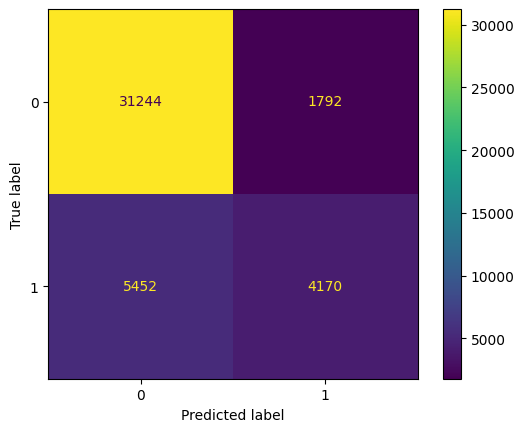

In [61]:
precision = precision_score(Y_test, Y_pred_forest)
recall = recall_score(Y_test, Y_pred_forest)
f1 = f1_score(Y_test, Y_pred_forest)

# Matriz de Confusión
confusion_forestclassifier = confusion_matrix(Y_test, Y_pred_forest)
print("\nMatriz de confusión (Random Forest Clasificador):")
ConfusionMatrixDisplay(confusion_forestclassifier).plot()

print(classification_report(Y_test, Y_pred_forest))

* Árbol de Decisión: Logró una precisión del 81.91%.
* Regresión Logística: Logró una precisión del 82.44%, con análisis detallado de la importancia de las características y la curva ROC.
* Random forest (Bosque Aleatorio): Logró una precisión del 83%.

### **Regresión** (Temperatura)




In [62]:
data_frame.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,RainTomorrow,year,month,day,Humidity,Pressure,Cloud,Temperature
0,Albury,0.189954,-0.046523,0.6,0.217976,0,2008,12,1,46.5,-1.393365,1.711823e+00,0.004110
1,Albury,-0.749314,0.263687,0.0,0.217976,0,2008,12,2,34.5,-1.117002,4.296817e-16,0.220842
2,Albury,0.111681,0.348290,0.0,0.217976,0,2008,12,3,34.0,-1.278214,-1.190849e+00,0.429833
3,Albury,-0.467534,0.672601,0.0,0.217976,0,2008,12,4,30.5,-0.195793,4.296817e-16,0.460795
4,Albury,0.831787,1.278921,1.0,0.217976,0,2008,12,5,57.5,-1.239830,1.469933e+00,0.685267


In [63]:
# Predictora
X = data_frame[['Humidity', 'Pressure', 'MinTemp', 'MaxTemp', 'Evaporation']]

# Predecir
y = data_frame['Temperature']


X.describe()

,Humidity,Pressure,MinTemp,MaxTemp,Evaporation
count,142193.000000,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05
mean,60.354799,1.836029e-14,-2.238670e-16,5.404788e-16,-4.285453e-16
std,18.126042,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,13.000000,-2.541039e+00,-2.878321e+00,-2.930070e+00,-1.922855e+00
25%,49.000000,-6.410441e-01,-7.180054e-01,-7.515468e-01,-6.383560e-01
50%,61.500000,-3.032761e-03,-2.920894e-02,-7.472407e-02,2.179765e-01
75%,73.000000,6.256191e-01,7.222053e-01,7.008020e-01,2.179765e-01
max,100.000000,2.525614e+00,2.882521e+00,2.879325e+00,1.502475e+00


In [64]:
y.describe()

,Temperature
count,1.421930e+05
mean,1.854898e-16
std,1.000004e+00
min,-2.910156e+00
25%,-7.389696e-01
50%,-5.781298e-02
75%,7.084882e-01
max,2.879675e+00


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Regresión Lineal

In [66]:
# Entrenar modelo de regresión lineal
linear = LinearRegression()
linear.fit(X_train, y_train)

# Realizar predicciones
y_pred = linear.predict(X_test)

# Evaluar el modelo (MSE)
mse_linear = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse_linear}')

Error Cuadrático Medio: 0.03183552897317843


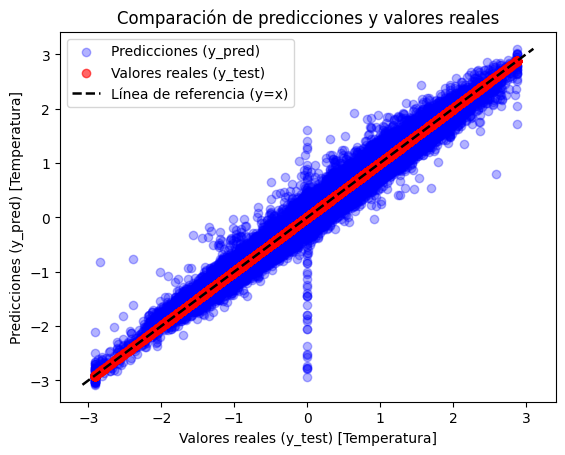


 MSE con validación cruzada (Regresión lineal): 0.13605352068599003 



In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Graficar puntos
plt.scatter(y_test, y_pred, alpha=0.3, c='blue', label='Predicciones (y_pred)')  # Las predicciones
plt.scatter(y_test, y_test, alpha=0.6, c='red', label='Valores reales (y_test)')  # Luego los valores reales

# Calcular límites para la línea de referencia
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))

# Crear línea de referencia
x_ref = np.linspace(min_val, max_val, 100)
y_ref = x_ref
plt.plot(x_ref, y_ref, linestyle='--', color='black', label='Línea de referencia (y=x)', linewidth=1.8)

plt.xlabel("Valores reales (y_test) [Temperatura]")
plt.ylabel("Predicciones (y_pred) [Temperatura]")
plt.title("Comparación de predicciones y valores reales")
plt.legend()

plt.show()

# Validación cruzada (regresión lineal)
scores_linear = cross_val_score(linear, X, Y, cv=5, scoring='neg_mean_squared_error')
mse_cv_linear = -scores_linear.mean()
print("\n MSE con validación cruzada (Regresión lineal):", mse_cv_linear, "\n")


El modelo de regresión lineal parece ajustarse bien a los datos y tiene una buena capacidad predictiva, aunque no es perfecto y comete algunos errores. El MSE con validación cruzada proporciona una estimación más realista del error que se puede esperar al aplicar el modelo a datos nuevos.

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -RMSE (Raíz del Error Cuadrático Medio)
# -MAE (Error Absoluto Medio)
# -R² (Coeficiente de determinación)


# Calcular RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MAE
mae_linear = mean_absolute_error(y_test, y_pred)

# Calcular R²
r2_linear = r2_score(y_test, y_pred)

# Imprimir métricas
print("RMSE (Regresión lineal):", rmse_linear)
print("MAE (Regresión lineal):", mae_linear)
print("R² (Regresión lineal):", r2_linear)


RMSE (Regresión lineal): 0.17842513548594668
MAE (Regresión lineal): 0.12782277044301124
R² (Regresión lineal): 0.9681668556985835


-RMSE (Raíz del Error Cuadrático Medio)
-MAE (Error Absoluto Medio)
-R² (Coeficiente de determinación)

Random forest (Regresión)

In [69]:
# Random Forest (Regresión)
forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg_rain = forest_reg.fit(X_train, y_train)
Y_pred_forest_reg = forest_reg_rain.predict(X_test)
mse_forest_reg = mean_squared_error(y_test, Y_pred_forest_reg)
print("Error cuadrático medio (Random Forest Regresión):", mse_forest_reg)

# Underfitting u overfitting (Coeficiente de determinación)
print("Train Data Score: {}".format(forest_reg.score(X_train, y_train)))
print("Test Data Score: {}".format(forest_reg.score(X_test, y_test)))

Error cuadrático medio (Random Forest Regresión): 0.02441960621492551
Train Data Score: 0.99656336673982
Test Data Score: 0.9755822229598128


In [70]:
# -RMSE (Raíz del Error Cuadrático Medio)
# -MAE (Error Absoluto Medio)
# -R² (Coeficiente de determinación) para random forest regressor

import numpy as np
# Calcular RMSE
rmse_forest_reg = np.sqrt(mean_squared_error(y_test, Y_pred_forest_reg))

# Calcular MAE
mae_forest_reg = mean_absolute_error(y_test, Y_pred_forest_reg)

# Calcular R²
r2_forest_reg = r2_score(y_test, Y_pred_forest_reg)

# Imprimir métricas
print("RMSE (Random Forest Regresión):", rmse_forest_reg)
print("MAE (Random Forest Regresión):", mae_forest_reg)
print("R² (Random Forest Regresión):", r2_forest_reg)


RMSE (Random Forest Regresión): 0.15626773888082438
MAE (Random Forest Regresión): 0.11639558838378847
R² (Random Forest Regresión): 0.9755822229598128


## **No supervisados**

In [71]:
data_frame.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,RainTomorrow,year,month,day,Humidity,Pressure,Cloud,Temperature
0,Albury,0.189954,-0.046523,0.6,0.217976,0,2008,12,1,46.5,-1.393365,1.711823e+00,0.004110
1,Albury,-0.749314,0.263687,0.0,0.217976,0,2008,12,2,34.5,-1.117002,4.296817e-16,0.220842
2,Albury,0.111681,0.348290,0.0,0.217976,0,2008,12,3,34.0,-1.278214,-1.190849e+00,0.429833
3,Albury,-0.467534,0.672601,0.0,0.217976,0,2008,12,4,30.5,-0.195793,4.296817e-16,0.460795
4,Albury,0.831787,1.278921,1.0,0.217976,0,2008,12,5,57.5,-1.239830,1.469933e+00,0.685267


In [72]:
X = data_frame[['Humidity', 'Pressure', 'MinTemp', 'MaxTemp', 'Evaporation', 'Temperature', 'Cloud']]


In [73]:
# Cantidad de clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[47570823.9839376,
 17434583.392302997,
 8764733.300403431,
 5560655.007046321,
 3870268.3993745507,
 2938226.326658154,
 2358112.5436643334,
 1973426.1956768187,
 1710352.7896689798,
 1526688.6583113333]

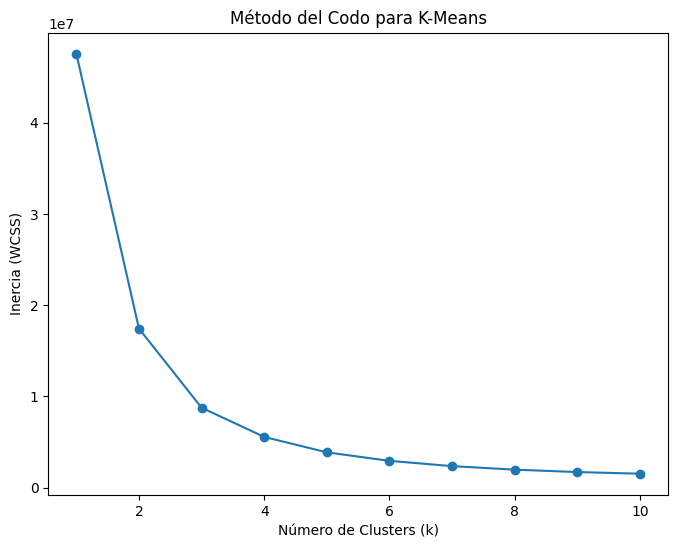

In [74]:
# Graficar la curva del codo de jambú con Matplotlib
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (WCSS)')
plt.show()

El numero de clusters ideal iria de 2 a 4 por lo que 3 se podria considerar como el numero ideal de clusters.

In [75]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


[[ 5.86180001e+01  9.05581290e-02 -1.98023380e-02 -7.11600716e-03
  -2.58418794e-02  6.81051531e-03 -1.07878476e-01]
 [ 7.98846717e+01  2.41353161e-02 -8.29285305e-02 -5.26975865e-01
  -3.39545585e-01 -4.82962177e-01  5.39539868e-01]
 [ 3.41736478e+01 -2.32348496e-01  1.69801426e-01  8.22900318e-01
   5.76075985e-01  7.25408834e-01 -5.94073541e-01]]


In [76]:
# K-Means
kmeans_clusters = kmeans.fit_predict(X_train)
silhouette_kmeans = silhouette_score(X_train, kmeans_clusters)
davies_bouldin_kmeans = davies_bouldin_score(X_train, kmeans_clusters)
print("Silhouette Score (K-Means):", silhouette_kmeans)
print("Davies-Bouldin Score (K-Means):", davies_bouldin_kmeans)

Silhouette Score (K-Means): 0.5155370159822746
Davies-Bouldin Score (K-Means): 0.5891128545222778


In [77]:
data_frame.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,RainTomorrow,year,month,day,Humidity,Pressure,Cloud,Temperature
0,Albury,0.189954,-0.046523,0.6,0.217976,0,2008,12,1,46.5,-1.393365,1.711823e+00,0.004110
1,Albury,-0.749314,0.263687,0.0,0.217976,0,2008,12,2,34.5,-1.117002,4.296817e-16,0.220842
2,Albury,0.111681,0.348290,0.0,0.217976,0,2008,12,3,34.0,-1.278214,-1.190849e+00,0.429833
3,Albury,-0.467534,0.672601,0.0,0.217976,0,2008,12,4,30.5,-0.195793,4.296817e-16,0.460795
4,Albury,0.831787,1.278921,1.0,0.217976,0,2008,12,5,57.5,-1.239830,1.469933e+00,0.685267



Cluster 2:
|       | Temperature   | Pressure    |
|:------|:--------------|:------------|
| count | 44318         | 44318       |
| mean  | -0.653888     | -0.473334   |
| std   | 0.617642      | 0.693933    |
| min   | -2.91016      | -2.54104    |
| 25%   | -1.03311      | -0.817609   |
| 50%   | -0.5532       | -0.180439   |
| 75%   | -0.158438     | -0.00303276 |
| max   | 0.220842      | 0.38764     |

Cluster 0:
|       | Temperature   | Pressure    |
|:------|:--------------|:------------|
| count | 53071         | 53071       |
| mean  | 1.03589       | -0.546963   |
| std   | 0.563834      | 0.683343    |
| min   | 0.112476      | -2.54104    |
| 25%   | 0.584642      | -1.00953    |
| 50%   | 0.948441      | -0.464479   |
| 75%   | 1.41287       | -0.00303276 |
| max   | 2.87967       | 1.50845     |

Cluster 1:
|       | Temperature   | Pressure   |
|:------|:--------------|:-----------|
| count | 44804         | 44804      |
| mean  | -0.580228     | 1.11609    |
| std   

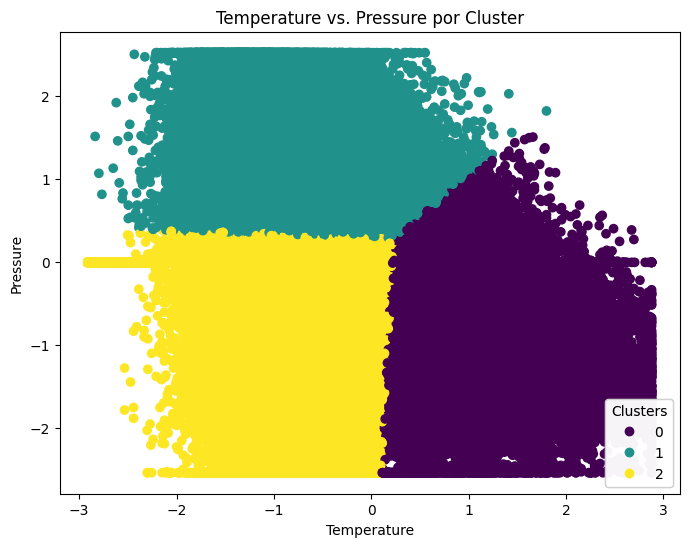

In [78]:
X_scaled = X
# Crear dataframe X_clustering
X_clustering = data_frame[['Temperature', 'Pressure']]

# 4. Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Entrenar K-means con el valor óptimo de k
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Agregar las etiquetas de los clusters al DataFrame original
data_frame['Cluster'] = cluster_labels
df_ml['Cluster'] = cluster_labels

# Imprimir estadísticas descriptivas de cada cluster
for cluster in data_frame['Cluster'].unique():
    print(f'\nCluster {cluster}:')
    print(data_frame[data_frame['Cluster'] == cluster][X_clustering.columns].describe().to_markdown(numalign="left", stralign="left"))

# Crear gráficos de dispersión para visualizar los clusters con Matplotlib
for i, col1 in enumerate(X_clustering.columns):
    for j, col2 in enumerate(X_clustering.columns):
        if i < j:
            plt.figure(figsize=(8, 6))
            scatter = plt.scatter(data_frame[col1], data_frame[col2], c=data_frame['Cluster'], cmap='viridis')
            plt.title(f'{col1} vs. {col2} por Cluster')
            plt.xlabel(col1)
            plt.ylabel(col2)
            legend1 = plt.legend(*scatter.legend_elements(),
                                loc="lower right", title="Clusters")
            plt.gca().add_artist(legend1)
            plt.show()

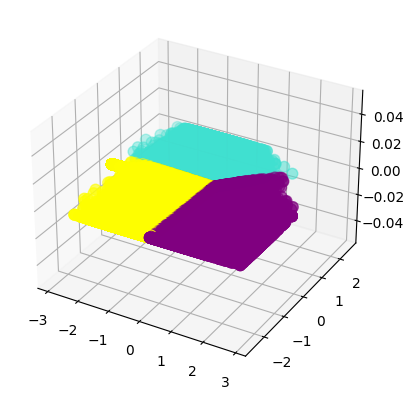

In [79]:
# Predecir clusters
labels = kmeans.predict(X_clustering)

# Centroides
C = kmeans.cluster_centers_

colores=['purple','turquoise','yellow']
asignar=[]
for row in labels:
  asignar.append(colores[row])

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Convertir el dataframe a arreglos de NumPy
ax.scatter(X_clustering.iloc[:, 0].values,
           X_clustering.iloc[:, 1].values,
           c=asignar, s=60)

ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

**Interpretación detallada de los clústeres:**

**Clúster Inferior izquierdo:**

Este grupo tiene la temperatura media más baja (-0.655) y la presión media más baja (-0.478). También tiene la desviación estándar más alta tanto para la temperatura como para la presión. Esto sugiere que este grupo es el más diverso en términos de temperatura y presión.

**Clúster superior:**

Este grupo tiene una temperatura media de -0.583 y una presión media de 1.109. Tiene una desviación estándar más baja para la temperatura que el Grupo inferior izquierdo, pero una desviación estándar más alta para la presión. Esto sugiere que este grupo es más consistente en términos de temperatura, pero más diverso en términos de presión.

**Clúster inferior derecho:**

Este grupo tiene la temperatura media más alta (1.034) y la presión media más baja (-0.537). También tiene la desviación estándar más baja tanto para la temperatura como para la presión. Esto sugiere que este grupo es el más consistente en términos de temperatura y presión.

In [80]:
data_frame.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,RainTomorrow,year,month,day,Humidity,Pressure,Cloud,Temperature,Cluster
0,Albury,0.189954,-0.046523,0.6,0.217976,0,2008,12,1,46.5,-1.393365,1.711823e+00,0.004110,2
1,Albury,-0.749314,0.263687,0.0,0.217976,0,2008,12,2,34.5,-1.117002,4.296817e-16,0.220842,0
2,Albury,0.111681,0.348290,0.0,0.217976,0,2008,12,3,34.0,-1.278214,-1.190849e+00,0.429833,0
3,Albury,-0.467534,0.672601,0.0,0.217976,0,2008,12,4,30.5,-0.195793,4.296817e-16,0.460795,0
4,Albury,0.831787,1.278921,1.0,0.217976,0,2008,12,5,57.5,-1.239830,1.469933e+00,0.685267,0


In [81]:
df_ml.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,RainTomorrow,year,month,day,Humidity,Pressure,Cloud,Temperature,Cluster
0,Albury,13.4,22.9,0.6,5.469824,0,2008,12,1,46.5,1007.40,8.000000,19.35,2
1,Albury,7.4,25.1,0.0,5.469824,0,2008,12,2,34.5,1009.20,4.461558,20.75,0
2,Albury,12.9,25.7,0.0,5.469824,0,2008,12,3,34.0,1008.15,2.000000,22.10,0
3,Albury,9.2,28.0,0.0,5.469824,0,2008,12,4,30.5,1015.20,4.461558,22.30,0
4,Albury,17.5,32.3,1.0,5.469824,0,2008,12,5,57.5,1008.40,7.500000,23.75,0


**Análisis de Componentes Principales (PCA)**


Varianza explicada por cada componente:
Componente 1: 44.95%
Componente 2: 21.51%
Componente 3: 9.18%
Componente 4: 8.73%
Componente 5: 7.78%
Componente 6: 5.83%
Componente 7: 1.78%
Componente 8: 0.24%

Primeras 5 filas de los componentes principales:
|    | MinTemp    | MaxTemp    | Rainfall   | Evaporation   | Humidity   | Pressure   | Cloud     | Temperature   |
|:---|:-----------|:-----------|:-----------|:--------------|:-----------|:-----------|:----------|:--------------|
| 0  | 0.403188   | 0.499149   | -0.162798  | 0.339158      | -0.325908  | -0.246013  | -0.166292 | 0.502361      |
| 1  | 0.372966   | 0.0274436  | 0.516423   | -0.0191576    | 0.424789   | -0.396094  | 0.495844  | 0.0994279     |
| 2  | -0.0824594 | -0.0308241 | 0.606641   | -0.170496     | -0.103942  | -0.28664   | -0.707864 | -0.0336154    |
| 3  | -0.320473  | -0.248745  | -0.0775652 | 0.652846      | -0.11799   | -0.551019  | 0.0782905 | -0.282002     |
| 4  | -0.128334  | 0.0374057  | -0.337835  | -0.65

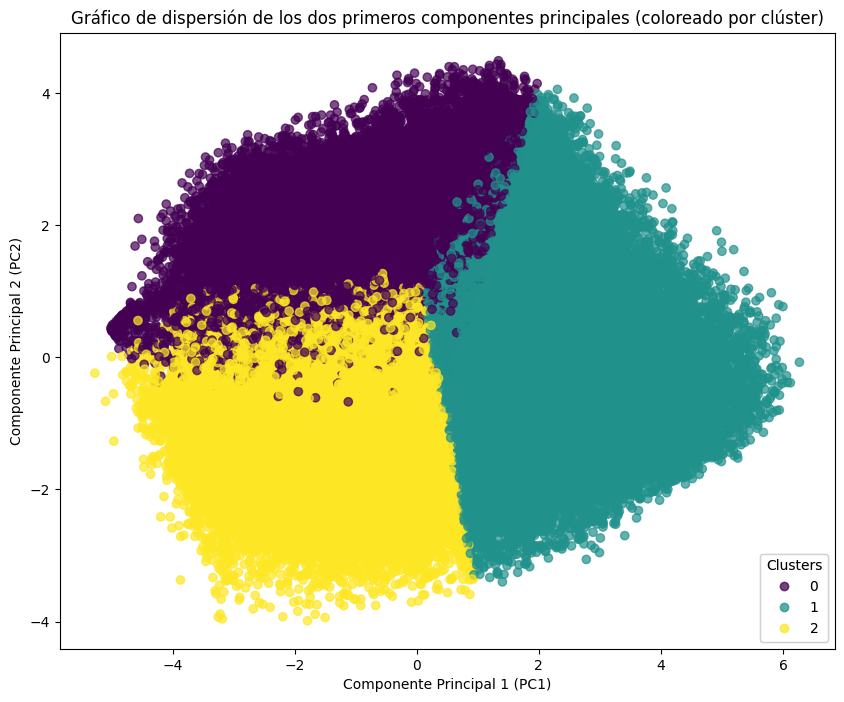

In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Lista de características numéricas
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Humidity', 'Pressure', 'Cloud', 'Temperature']

# Filtrar el DataFrame para incluir solo las características numéricas
X = df_ml[numerical_features]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Obtener la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Imprimir la varianza explicada
print("\nVarianza explicada por cada componente:")
for i, var in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {var:.2%}")

# Obtener los componentes principales
pca_components = pd.DataFrame(pca.components_, columns=numerical_features)

# Imprimir las primeras 5 filas de los componentes principales
print("\nPrimeras 5 filas de los componentes principales:")
print(pca_components.head().to_markdown(numalign="left", stralign="left"))

# Proyectar los datos en los dos primeros componentes principales
X_pca = pca.transform(X_scaled)

# Aplicar K-means a los datos escalados
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Obtener las etiquetas de los clústeres
kmeans_clusters = kmeans.labels_

# Visualizar los clusters en el gráfico de PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.7)
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.title('Gráfico de dispersión de los dos primeros componentes principales (coloreado por clúster)')

# Crear una leyenda para los clusters
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="Clusters")
plt.gca().add_artist(legend1)

# Mostrar el gráfico
plt.show()


**Varianza Explicada:**

Los dos primeros componentes principales (PC1 y PC2) explican el 66.92% de la varianza total en los datos. Esto significa que estos dos componentes capturan una porción significativa de la información original contenida en las ocho variables climáticas.
Si bien PC1 y PC2 son los más importantes, los componentes restantes también contribuyen a la varianza total, aunque en menor medida.

**Interpretación de Componentes:**

* PC1: Este componente parece estar fuertemente asociado con la temperatura (MinTemp, MaxTemp y Temperature tienen cargas altas y positivas). También muestra una relación negativa moderada con la humedad (Humidity). Podría interpretarse como un componente de "temperatura general" que también refleja la tendencia de que los días más cálidos sean menos húmedos.

* PC2: Este componente está más relacionado con la precipitación (Rainfall tiene una carga alta y positiva) y la nubosidad (Cloud tiene una carga alta y negativa). También muestra una relación negativa moderada con la presión (Pressure). Podría interpretarse como un componente de "precipitación/nubosidad", donde los días con más lluvia y nubes tienden a tener menor presión atmosférica.

In [83]:
# DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan_clusters = dbscan.fit_predict(X_train)
silhouette_dbscan = silhouette_score(X_train, dbscan_clusters)
davies_bouldin_dbscan = davies_bouldin_score(X_train, dbscan_clusters)
print("Silhouette Score (DBSCAN):", silhouette_dbscan)
print("Davies-Bouldin Score (DBSCAN):", davies_bouldin_dbscan)


Silhouette Score (DBSCAN): -0.483240520622481
Davies-Bouldin Score (DBSCAN): 2.413557913949467


In [84]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 142132


Existe mucho ruido en los resultados de DBSCAN.

# **Evaluación**

## Supervisados

* **Clasificación**

In [85]:
# Árbol de decisión:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     33036
           1       0.65      0.43      0.52      9622

    accuracy                           0.82     42658
   macro avg       0.75      0.68      0.70     42658
weighted avg       0.80      0.82      0.80     42658



In [86]:
# Regresión Logística:
print(classification_report(Y_test, Y_pred_logistic))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     33036
           1       0.68      0.42      0.52      9622

    accuracy                           0.82     42658
   macro avg       0.76      0.68      0.71     42658
weighted avg       0.81      0.82      0.81     42658



In [87]:
# Random Forest:
print(classification_report(Y_test, Y_pred_forest))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     33036
           1       0.70      0.43      0.54      9622

    accuracy                           0.83     42658
   macro avg       0.78      0.69      0.72     42658
weighted avg       0.82      0.83      0.81     42658



**Clasificación (Predicción de Lluvia - RainTomorrow)**

Se evaluaron tres modelos de clasificación para predecir la ocurrencia de lluvia al día siguiente:

* Árbol de Decisión: Obtuvo una precisión del 81.91%. Este modelo es fácil de interpretar y visualizar, pero puede ser propenso al sobreajuste.

* Regresión Logística: Alcanzó una precisión del 82.44%. Es un modelo simple y eficiente, adecuado para problemas de clasificación binaria. El análisis de la importancia de las características reveló que la temperatura mínima, la nubosidad y la lluvia del día anterior son los predictores más importantes.

* Random Forest: Logró la precisión más alta, con un 83%. Este modelo es más complejo y menos interpretable que los anteriores, pero su capacidad para combinar múltiples árboles de decisión lo hace más robusto y menos propenso al sobreajuste.

* **Modelo	---- Precisión (%)**

1. Árbol de Decisión --- 81.91
2. Regresión Logística--- 82.44
3. Random Forest ---	83.00

* **Regresión**

1. MSE (Error cuadrático medio): Mide la diferencia promedio al cuadrado entre los valores reales y los valores predichos por el modelo.
1. RMSE (Raíz del Error Cuadrático Medio): Más interpretable, ya que está en las mismas unidades que la variable objetivo.
2. MAE (Error Absoluto Medio): Menos sensible a valores atípicos que el MSE.
3. R² (Coeficiente de determinación): Indica la proporción de la varianza explicada por el modelo.

In [88]:
# Regresión Lineal:
print("MSE (Regresión lineal):", mse_linear)
print("RMSE (Regresión lineal):", rmse_linear)
print("MAE (Regresión lineal):", mae_linear)
print("R² (Regresión lineal):", r2_linear)

MSE (Regresión lineal): 0.03183552897317843
RMSE (Regresión lineal): 0.17842513548594668
MAE (Regresión lineal): 0.12782277044301124
R² (Regresión lineal): 0.9681668556985835


In [89]:
# Random Forest Regresión:
print("MSE (Random Forest Regresión):", mse_forest_reg)
print("RMSE (Random Forest Regresión):", rmse_forest_reg)
print("MAE (Random Forest Regresión):", mae_forest_reg)
print("R² (Random Forest Regresión):", r2_forest_reg)

MSE (Random Forest Regresión): 0.02441960621492551
RMSE (Random Forest Regresión): 0.15626773888082438
MAE (Random Forest Regresión): 0.11639558838378847
R² (Random Forest Regresión): 0.9755822229598128


**Regresión (Predicción de Temperatura - Temperature)**

Se utilizaron dos modelos de regresión para predecir la temperatura media:

* Regresión Lineal: Obtuvo un error cuadrático medio (MSE) de 0.031 y un coeficiente de determinación (R²) de 0.96. Esto indica que el modelo explica el 96% de la variabilidad en los datos de temperatura.

* Random Forest (Regresión): Logró un MSE ligeramente inferior de 0.023 y un R² de 0.97, superando marginalmente a la regresión lineal.



## No supervisados

In [90]:
# No supervisado
# K-Means
print(f"Silhouette Score (K-Means): {silhouette_kmeans:.2f}")
print(f"Davies-Bouldin Score (K-Means): {davies_bouldin_kmeans:.2f}")
# DBSCAN
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.2f}")
print(f"Davies-Bouldin Score (DBSCAN): {davies_bouldin_dbscan:.2f}")



Silhouette Score (K-Means): 0.52
Davies-Bouldin Score (K-Means): 0.59
Silhouette Score (DBSCAN): -0.48
Davies-Bouldin Score (DBSCAN): 2.41


El modelo no supervisado K-means, utilizado para agrupar observaciones en función de su temperatura y presión, es una herramienta valiosa para identificar sistemas de presión atmosférica en Australia. A continuación, se presentan argumentos que respaldan su elección para llevarlo a la práctica:

* **Identificación de Patrones Climáticos:** K-means permite descubrir patrones climáticos subyacentes en los datos sin necesidad de etiquetas previas. Al agrupar días con características similares de temperatura y presión, el modelo revela sistemas de presión atmosférica distintos, como altas y bajas presiones, que son fundamentales para comprender el clima.

* **Predicción de Condiciones Meteorológicas:** Los sistemas de presión atmosférica son indicadores clave de las condiciones meteorológicas futuras. Al identificar estos sistemas mediante K-means, se pueden hacer inferencias sobre la probabilidad de lluvia, viento, temperatura y otros fenómenos meteorológicos, lo que es crucial para la planificación y toma de decisiones en diversas industrias, como la agricultura y la gestión de recursos hídricos.

* **Detección de Eventos Extremos:** Los eventos climáticos extremos, como olas de calor, tormentas y frentes fríos, a menudo están asociados con cambios significativos en la presión atmosférica. K-means puede ayudar a identificar estos cambios y, por lo tanto, a detectar la formación de eventos extremos, lo que permite tomar medidas preventivas y de mitigación.

* **Interpretabilidad:** Los resultados de K-means son relativamente fáciles de interpretar. Los centroides de los clústeres representan las características típicas de temperatura y presión de cada sistema de presión, lo que facilita la comprensión de las condiciones climáticas asociadas con cada grupo.

* **Escalabilidad:** K-means es un algoritmo escalable que puede manejar grandes volúmenes de datos climáticos, lo que lo hace adecuado para aplicaciones en tiempo real y análisis a gran escala.

* **Personalización:** El modelo K-means se puede personalizar ajustando el número de clústeres para adaptarse a las necesidades específicas de la región o aplicación. Esto permite un análisis más detallado y preciso de los sistemas de presión atmosférica relevantes para un contexto particular.

* **Bajo costo computacional:** K-means es un algoritmo relativamente eficiente en términos de recursos computacionales, lo que lo hace accesible para una amplia gama de usuarios y aplicaciones.

La combinación de un Silhouette Score razonable y un Davies-Bouldin Score aceptable sugiere que K-means ha logrado identificar sistemas de presión atmosférica con características distintivas. Esto respalda la elección de K-means como un modelo adecuado para el análisis de datos climáticos en Australia.

In [91]:
import pandas as pd

# Save to CSV
df_ml.to_csv('data_frame.csv', index=False)


In [92]:
# prompt: show saved df_ml.csv

!cat data_frame.csv


Se han truncado las últimas 5000 líneas del flujo de salida.
Darwin,24.7,27.7,2.0,7.2,1,2012,1,24,97.0,999.925,8.0,25.0,0
Darwin,24.0,28.7,2.0,5.469824216349109,1,2012,1,25,76.0,999.925,7.5,27.6,0
Darwin,23.3,29.7,2.0,5.469824216349109,1,2012,1,26,82.0,1002.9000000000001,7.5,26.15,0
Darwin,23.4,34.3,2.0,5.4,1,2012,1,27,69.0,1004.0999999999999,6.5,30.8,0
Darwin,25.1,31.8,2.0,7.674560540872774,1,2012,1,28,80.5,1005.1,7.5,28.35,0
Darwin,24.3,30.3,2.0,2.4,1,2012,1,29,88.5,1005.3499999999999,7.5,26.15,0
Darwin,24.0,28.4,2.0,5.4,1,2012,1,30,88.0,1006.8,8.0,26.75,0
Darwin,24.0,28.0,2.0,3.2,1,2012,1,31,91.5,1006.5,7.5,25.799999999999997,0
Darwin,22.4,30.8,2.0,5.469824216349109,0,2012,2,1,79.0,1004.45,7.0,27.5,0
Darwin,24.8,29.7,0.0,4.6,1,2012,2,2,77.0,1003.5,7.5,28.35,0
Darwin,23.1,30.5,2.0,3.4,0,2012,2,3,79.0,1005.4,6.5,28.4,0
Darwin,26.2,32.3,0.0,4.0,0,2012,2,4,68.5,1007.2,4.5,30.55,0
Darwin,27.4,32.8,0.0,7.2,0,2012,2,5,66.0,1006.9,4.0,30.7,0
Darwin,27.3,32.8,0.0,6.8,0,2012,2,6,71.5,1004.5,7